# Calculating LEI

This script is used for exploring LEI methods - in order to calculate LEI proper, look for the LEIFast.py script in GOST_Rocks/Urban

In [2]:
import os, sys, logging

import geojson, rasterio
import rasterio.features

import pandas as pd
import numpy as np

from shapely.geometry import shape, GeometryCollection
from shapely.wkt import loads
from matplotlib import pyplot
from rasterio.plot import show, show_hist

#Import GOST urban functions
sys.path.append("../")
from src.LEI import *


In [2]:
LEI_folder = '/home/wb411133/data/Projects/LEI'
results = {}
GHSL_files = []
for root, dirs, files in os.walk(LEI_folder):
    if os.path.exists(os.path.join(root, "GHSL.tif")):
        GHSL_files.append(os.path.join(root, "GHSL.tif"))
    try:
        results[os.path.basename(root)] = [len(files), os.stat(os.path.join(root, "GHSL.tif")).st_size]
        if len(files) != 6:
            print("%s - %s" % (os.path.basename(root), os.stat(os.path.join(root, "GHSL.tif")).st_size))
    except:
        pass

3396 - 4442411
4884 - 215667
5735 - 949699
4181 - 467387
3675 - 14360049
3294 - 909257
1838 - 1721668
1780 - 3666119
2395 - 336035
2233 - 184869
3506 - 348197
2851 - 3488015
3216 - 2869413
2782 - 324023
1912 - 11707899
2133 - 2067996
3402 - 165223
2046 - 8193079
160 - 425647
3027 - 2005552
1969 - 239490
9602 - 867073
3193 - 2218475
3626 - 512848
2314 - 304616
5066 - 1084437
2559 - 3530835
1017 - 4109520
101 - 4875699
554 - 5753815
3270 - 1039167
6003 - 556629
1004 - 595739
754 - 807555
634 - 17983983
790 - 5900555
3562 - 8880882
3384 - 533653
945 - 26177297
5528 - 1158214
1701 - 3487595
10687 - 8548405
898 - 11330611
10991 - 2503614
10922 - 2571210
12109 - 941043
4216 - 473464
4463 - 307278
2959 - 680791
35 - 513398
12389 - 8465346
5840 - 177659
12492 - 422555
2095 - 2959543
11223 - 3050623
10782 - 305167
11771 - 1897469
11148 - 192859
775 - 933689
2783 - 43791
5737 - 5629803
12964 - 20801639
12661 - 192443
12611 - 532807
12678 - 1939587
11009 - 1931283
5756 - 291036
12838 - 1798123
61

6067 - 53969
10488 - 43461
3618 - 112410
11986 - 18779
3488 - 105107
10738 - 539019
588 - 294286
911 - 199493
947 - 80578
3826 - 53837
10697 - 96246
11804 - 49487
3603 - 74999
5954 - 279363
10398 - 984547
895 - 318553
949 - 1752555
10432 - 38683
12273 - 83449
10849 - 152156
12257 - 132739
5751 - 39048
10375 - 37153
11153 - 79648
12204 - 15339
5977 - 119238
11030 - 137740
5468 - 46347
11823 - 61501
5996 - 101345
11932 - 34070
277 - 183621
6029 - 17679
10816 - 134827
887 - 250459
903 - 180798
1674 - 67143
1952 - 228355
5461 - 84171
5495 - 80699
11969 - 22657
11144 - 386163
10786 - 306443
942 - 725578
3809 - 1457363
4919 - 61240
11815 - 79431
5979 - 186671
4624 - 120528
11697 - 46173
3795 - 744158
10917 - 133347
11855 - 14560
12034 - 84988
729 - 2612661
10291 - 59587
11786 - 143083
11872 - 28085
12225 - 18570
12224 - 585237
10120 - 53979
10412 - 118123
10559 - 65685
10179 - 28931
10240 - 172643
10975 - 238328
5341 - 47934
12007 - 28215
11917 - 27305
12228 - 23312
11883 - 15779
9621 - 1364

12341 - 132511
147 - 147716
1598 - 19971
10808 - 26845
6162 - 12314
6335 - 18327
4411 - 36313
6362 - 34147
11987 - 181971
5874 - 125041
4331 - 129264
12101 - 201675
6511 - 50579
11029 - 183175
6445 - 18285
6551 - 60619
6591 - 81581
1547 - 160053
1557 - 32292
1571 - 20124
6576 - 56857
10841 - 39543
5386 - 28363
10391 - 29490
6552 - 12468
12245 - 173819
12201 - 632478
4359 - 135334
11608 - 194413
5670 - 54445
6649 - 90029
12153 - 212384
11443 - 47094
12289 - 106875
12055 - 624639
12231 - 159827
5499 - 31745
6468 - 21135
11373 - 344044
11196 - 112585
84 - 1538738
11521 - 188795
6530 - 71486
12218 - 174764
6650 - 54911
6657 - 11095
4450 - 24783
12002 - 92268
6668 - 85501
10582 - 32893
6030 - 9003
6439 - 79863
6353 - 193986
3459 - 135493
1582 - 45991
10929 - 58085
12056 - 451715
12399 - 149881
5711 - 87644
6579 - 54672
6681 - 12387
3349 - 617275
4399 - 52402
11113 - 783997
5823 - 85781
6699 - 9195
6482 - 18171
12319 - 1288087
5387 - 215775
12272 - 253695
11522 - 68095
235 - 141267
5428 - 16

7582 - 25103
10062 - 200155
7890 - 33741
8832 - 28669
8843 - 162451
10981 - 22524
6176 - 24498
7123 - 12993
7298 - 82795
7371 - 24921
9578 - 66259
9623 - 30605
7404 - 9893
8530 - 629635
4109 - 152021
10623 - 65625
9463 - 352224
12563 - 107283
4086 - 64360
6194 - 50227
7652 - 37715
8490 - 21396
9518 - 47675
9989 - 274695
10364 - 49619
10740 - 53802
8422 - 24498
12446 - 62247
8502 - 19281
8788 - 54013
8848 - 25070
8896 - 17871
9034 - 36307
9347 - 30710
9588 - 50979
10667 - 48627
7255 - 15961
7538 - 42651
8136 - 3747
8955 - 56761
10322 - 45675
6670 - 47051
7599 - 30428
9408 - 21537
9888 - 101271
7614 - 35603
8432 - 16067
6137 - 2235
7826 - 101139
8616 - 1020093
7742 - 62995
7991 - 26621
8770 - 35603
8995 - 38771
4112 - 168967
6950 - 28454
8272 - 92415
6215 - 30491
7431 - 7037
8166 - 28555
6223 - 46198
7981 - 37891
9066 - 38243
10068 - 92627
12506 - 42651
7483 - 59296
8911 - 169362
10632 - 133093
11302 - 25493
7572 - 13099
8234 - 17307
11623 - 93995
7026 - 22947
7660 - 28731
9245 - 323497


8132 - 8115
9088 - 23235
9675 - 65885
12276 - 184618
9182 - 76909
5958 - 287075
9153 - 75515
9278 - 245827
9800 - 62783
5903 - 36443
9638 - 45699
9713 - 50399
169 - 37973
7764 - 12121
9363 - 9418
9484 - 68163
9771 - 59689
8025 - 7401
9402 - 1453663
9741 - 49379
10574 - 95659
10950 - 16550
11981 - 35423
12340 - 32735
7006 - 26562
7452 - 19704
9210 - 29465
9259 - 12636
9687 - 21896
12497 - 484409
8796 - 7470
9373 - 40625
11546 - 47127
7621 - 15747
8014 - 9349
11157 - 30368
6782 - 4579
6849 - 36851
5966 - 70339
6677 - 95081
9865 - 181291
5963 - 241331
6622 - 97469
12278 - 45869
6483 - 7263
7265 - 11915
6778 - 7332
9775 - 20115
9922 - 105940
9930 - 62783
12142 - 103827
9802 - 47059
11660 - 78779
6793 - 2148
9515 - 133048
9390 - 6313
6660 - 41033
6898 - 71427
7735 - 9349
8160 - 18849
9714 - 19971
9743 - 27187
9140 - 4848
8036 - 7401
7523 - 41551
6578 - 9649
9529 - 106582
10002 - 98438
11816 - 147047
6602 - 10679
6716 - 42775
9705 - 18203
10370 - 23779
5965 - 32873
6748 - 10681
7119 - 23235


7703 - 12091
10190 - 17667
1508 - 11707
5558 - 3435
8553 - 63854
8646 - 25355
5846 - 37683
8458 - 21891
1461 - 46044
12770 - 92781
8715 - 16507
5545 - 18450
7816 - 25835
296 - 13819
5607 - 5888
7149 - 27115
12772 - 634018
11821 - 586318
12776 - 59076
10365 - 24714
12789 - 67335
7741 - 11419
5844 - 32195
7627 - 61387
2365 - 7851
8637 - 21891
12779 - 66221
7185 - 22467
11864 - 64030
8193 - 12859
8121 - 12763
5838 - 12794
352 - 52155
12787 - 48352
7402 - 17659
280 - 15835
319 - 11195
8527 - 11419
4341 - 30475
7322 - 227549
12812 - 35929
8609 - 135562
4974 - 25227
7928 - 24387
7775 - 23124
7453 - 12763
7662 - 11899
8460 - 18513
373 - 123935
7611 - 12091
8359 - 21763
7503 - 12091
8065 - 156679
3493 - 8235
340 - 44099
5581 - 11707
10630 - 70545
5609 - 26630
7339 - 15995
7806 - 32831
5547 - 5163
7886 - 34111
1466 - 44341
5169 - 44150
5571 - 8438
320 - 3083
8451 - 11067
8337 - 9883
5600 - 3371
11902 - 70011
1626 - 4203
8338 - 9211
4343 - 68589
327 - 14819
8550 - 71475
7427 - 33446
12799 - 1396

912 - 8275
1964 - 10888
2336 - 5075
11576 - 4021
4671 - 5199
7963 - 2597643
2660 - 41995
2184 - 29159
5478 - 4411
2289 - 14422
4931 - 2827
5404 - 5261
2513 - 18960
5183 - 18288
8398 - 98359
8291 - 10175
8307 - 53491
8046 - 194696
4166 - 4269
5038 - 4455
3005 - 5075
3765 - 7723
4864 - 5261
5189 - 72125
2210 - 18837
2999 - 9850
563 - 103227
3360 - 2843
8071 - 79931
4741 - 14893
2375 - 7431
4901 - 5261
5416 - 5199
8407 - 109265
8292 - 104102
8224 - 15073
2743 - 14401
5363 - 1675
2796 - 10775
3284 - 27995
4598 - 2827
3139 - 5075
5045 - 7896
5278 - 7896
602 - 14980
5504 - 2967
1959 - 2795
4434 - 1643
5321 - 5261
2151 - 91953
8072 - 281847
2922 - 11074
5025 - 5261
1509 - 49363
3308 - 2843
1524 - 41811
8105 - 86515
756 - 126874
5084 - 7524
715 - 36358
4465 - 5261
5000 - 2967
5138 - 7631
5391 - 5199
4667 - 4319
4962 - 5323
5521 - 2967
5227 - 23487
4649 - 11074
8408 - 41067
9112 - 48786
1531 - 23643
3245 - 41691
5392 - 1675
633 - 3153
2009 - 10775
1904 - 10888
2636 - 28363
4590 - 14155
5007 - 1

12499 - 1101097
12562 - 255483
12507 - 50495
12664 - 101422
1434 - 28547
4316 - 39443
12416 - 66160
1416 - 19329
12394 - 6830266
12502 - 56244
3752 - 9895
3727 - 23643
1140 - 34990
12546 - 443671
3745 - 10867
1443 - 36088
12612 - 69243
12517 - 332531
12559 - 346386
466 - 175617
4771 - 14032
12592 - 52592
12707 - 242537
12531 - 742829
12642 - 290413
12606 - 199483
12610 - 5270555
1439 - 24255
12704 - 36442
3695 - 18837
12645 - 120051
12469 - 83996
12639 - 56974
1445 - 1424471
3732 - 10867
13004 - 40671
12677 - 116088
1436 - 62647
1447 - 28333
1433 - 14608
12688 - 43830
12968 - 68487
13118 - 3649
12650 - 1509401
622 - 106615
12669 - 67320
1428 - 29193
3432 - 23031
12671 - 40751
12719 - 64687
12802 - 55067
3987 - 14278
12747 - 57137
12672 - 144777
12864 - 31307
12798 - 18695
13063 - 56051
12713 - 28915
12786 - 28455
13015 - 80675
12814 - 36901
3100 - 17685
12733 - 181987
12706 - 99545
3899 - 7631
12939 - 65795
12891 - 48619
12730 - 96262
12729 - 92643
12731 - 402839
12725 - 738579
3079 - 

# Vizualize raster data - GHSL

In [3]:
root = '/home/wb411133/data/Projects/LEI/634/'
inputGHSL = os.path.join(root, "GHSL.tif")
inRaster = rasterio.open(inputGHSL)
inR = inRaster.read()

newR = (inR == 3).astype('int')
oldR = (np.isin(inR, [4,5,6])).astype('int')

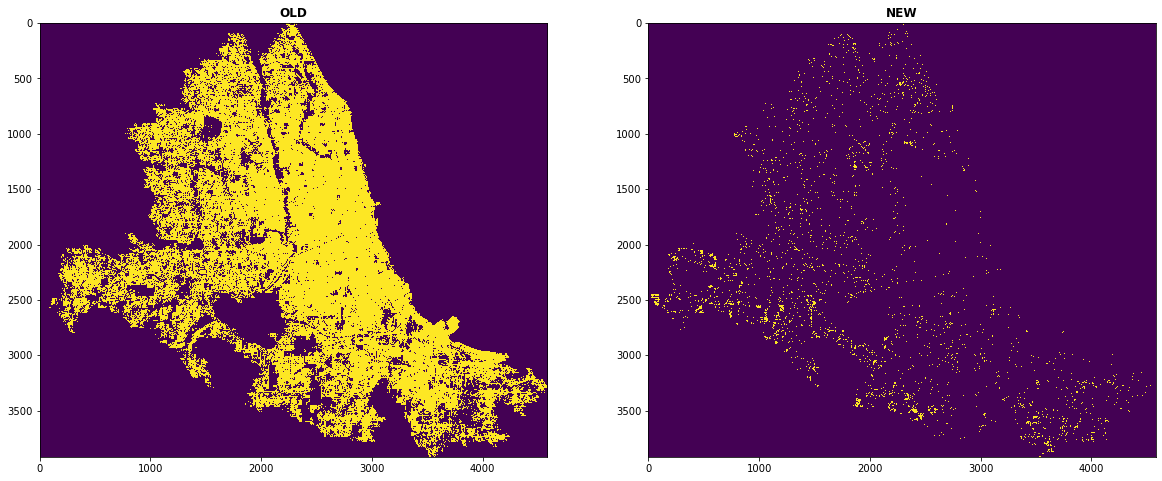

In [4]:
fig, (axr, axg) = pyplot.subplots(1, 2, figsize=(20,20))
show(oldR, ax=axr, title='OLD')
show(newR, ax=axg, title='NEW')

In [6]:
#write out raster to file
outProperties = inRaster.profile
outRaster = outRaster.astype('int32')
outProperties['dtype'] = 'int32'
with rasterio.open(inputGHSL.replace(".tif", "_LEI.tif"), 'w', **outProperties) as out:
    out.write(outRaster)

# Calculate LEI

In [22]:
for ghsl_file in GHSL_files:
    print(f'{ghsl_file}')
    out_file = ghsl_file.replace(".tif", "new_LEI_90_00.csv")
    if not os.path.exists(out_file):
        lei = calculate_LEI(ghsl_file, old_list = [5,6], new_list=[4])
        xx = pd.DataFrame(lei, columns=['geometry', 'old', 'total'])
        xx['LEI'] = xx['old'] / xx['total']
        xx.to_csv(out_file)

/home/wb411133/data/Projects/LEI/3396/GHSL.tif
/home/wb411133/data/Projects/LEI/4884/GHSL.tif
/home/wb411133/data/Projects/LEI/5735/GHSL.tif
/home/wb411133/data/Projects/LEI/4181/GHSL.tif
/home/wb411133/data/Projects/LEI/3675/GHSL.tif
/home/wb411133/data/Projects/LEI/3294/GHSL.tif
/home/wb411133/data/Projects/LEI/1838/GHSL.tif
/home/wb411133/data/Projects/LEI/1780/GHSL.tif
/home/wb411133/data/Projects/LEI/2395/GHSL.tif
/home/wb411133/data/Projects/LEI/2233/GHSL.tif
/home/wb411133/data/Projects/LEI/3506/GHSL.tif
/home/wb411133/data/Projects/LEI/2851/GHSL.tif
/home/wb411133/data/Projects/LEI/3216/GHSL.tif
/home/wb411133/data/Projects/LEI/2782/GHSL.tif
/home/wb411133/data/Projects/LEI/1912/GHSL.tif
/home/wb411133/data/Projects/LEI/2133/GHSL.tif
/home/wb411133/data/Projects/LEI/3402/GHSL.tif
/home/wb411133/data/Projects/LEI/2046/GHSL.tif
/home/wb411133/data/Projects/LEI/160/GHSL.tif
/home/wb411133/data/Projects/LEI/3027/GHSL.tif
/home/wb411133/data/Projects/LEI/1969/GHSL.tif
/home/wb411133

/home/wb411133/data/Projects/LEI/897/GHSL.tif
/home/wb411133/data/Projects/LEI/13135/GHSL.tif
/home/wb411133/data/Projects/LEI/4523/GHSL.tif
/home/wb411133/data/Projects/LEI/1347/GHSL.tif
/home/wb411133/data/Projects/LEI/4521/GHSL.tif
/home/wb411133/data/Projects/LEI/1346/GHSL.tif
/home/wb411133/data/Projects/LEI/1303/GHSL.tif
/home/wb411133/data/Projects/LEI/1242/GHSL.tif
/home/wb411133/data/Projects/LEI/3673/GHSL.tif
/home/wb411133/data/Projects/LEI/1281/GHSL.tif
/home/wb411133/data/Projects/LEI/1035/GHSL.tif
/home/wb411133/data/Projects/LEI/931/GHSL.tif
/home/wb411133/data/Projects/LEI/3505/GHSL.tif
/home/wb411133/data/Projects/LEI/13043/GHSL.tif
/home/wb411133/data/Projects/LEI/1105/GHSL.tif
/home/wb411133/data/Projects/LEI/13130/GHSL.tif
/home/wb411133/data/Projects/LEI/13129/GHSL.tif
/home/wb411133/data/Projects/LEI/5782/GHSL.tif
/home/wb411133/data/Projects/LEI/3316/GHSL.tif
/home/wb411133/data/Projects/LEI/5645/GHSL.tif
/home/wb411133/data/Projects/LEI/3185/GHSL.tif
/home/wb411

/home/wb411133/data/Projects/LEI/1667/GHSL.tif
/home/wb411133/data/Projects/LEI/3460/GHSL.tif
/home/wb411133/data/Projects/LEI/5072/GHSL.tif
/home/wb411133/data/Projects/LEI/3309/GHSL.tif
/home/wb411133/data/Projects/LEI/3060/GHSL.tif
/home/wb411133/data/Projects/LEI/4596/GHSL.tif
/home/wb411133/data/Projects/LEI/2554/GHSL.tif
/home/wb411133/data/Projects/LEI/4584/GHSL.tif
/home/wb411133/data/Projects/LEI/3380/GHSL.tif
/home/wb411133/data/Projects/LEI/3421/GHSL.tif
/home/wb411133/data/Projects/LEI/4664/GHSL.tif
/home/wb411133/data/Projects/LEI/2966/GHSL.tif
/home/wb411133/data/Projects/LEI/2753/GHSL.tif
/home/wb411133/data/Projects/LEI/3126/GHSL.tif
/home/wb411133/data/Projects/LEI/3743/GHSL.tif
/home/wb411133/data/Projects/LEI/4400/GHSL.tif
/home/wb411133/data/Projects/LEI/3091/GHSL.tif
/home/wb411133/data/Projects/LEI/3417/GHSL.tif
/home/wb411133/data/Projects/LEI/1764/GHSL.tif
/home/wb411133/data/Projects/LEI/1840/GHSL.tif
/home/wb411133/data/Projects/LEI/1874/GHSL.tif
/home/wb41113

/home/wb411133/data/Projects/LEI/2003/GHSL.tif
/home/wb411133/data/Projects/LEI/9680/GHSL.tif
/home/wb411133/data/Projects/LEI/1887/GHSL.tif
/home/wb411133/data/Projects/LEI/2164/GHSL.tif
/home/wb411133/data/Projects/LEI/2209/GHSL.tif
/home/wb411133/data/Projects/LEI/2181/GHSL.tif
/home/wb411133/data/Projects/LEI/2144/GHSL.tif
/home/wb411133/data/Projects/LEI/2432/GHSL.tif
/home/wb411133/data/Projects/LEI/4644/GHSL.tif
/home/wb411133/data/Projects/LEI/2226/GHSL.tif
/home/wb411133/data/Projects/LEI/2359/GHSL.tif
/home/wb411133/data/Projects/LEI/1946/GHSL.tif
/home/wb411133/data/Projects/LEI/2420/GHSL.tif
/home/wb411133/data/Projects/LEI/1803/GHSL.tif
/home/wb411133/data/Projects/LEI/1593/GHSL.tif
/home/wb411133/data/Projects/LEI/1920/GHSL.tif
/home/wb411133/data/Projects/LEI/2123/GHSL.tif
/home/wb411133/data/Projects/LEI/1993/GHSL.tif
/home/wb411133/data/Projects/LEI/3604/GHSL.tif
/home/wb411133/data/Projects/LEI/3006/GHSL.tif
/home/wb411133/data/Projects/LEI/1790/GHSL.tif
/home/wb41113

/home/wb411133/data/Projects/LEI/2082/GHSL.tif
/home/wb411133/data/Projects/LEI/1707/GHSL.tif
/home/wb411133/data/Projects/LEI/3517/GHSL.tif
/home/wb411133/data/Projects/LEI/3355/GHSL.tif
/home/wb411133/data/Projects/LEI/2104/GHSL.tif
/home/wb411133/data/Projects/LEI/2369/GHSL.tif
/home/wb411133/data/Projects/LEI/2072/GHSL.tif
/home/wb411133/data/Projects/LEI/3134/GHSL.tif
/home/wb411133/data/Projects/LEI/5634/GHSL.tif
/home/wb411133/data/Projects/LEI/10454/GHSL.tif
/home/wb411133/data/Projects/LEI/3462/GHSL.tif
/home/wb411133/data/Projects/LEI/2992/GHSL.tif
/home/wb411133/data/Projects/LEI/2921/GHSL.tif
/home/wb411133/data/Projects/LEI/3156/GHSL.tif
/home/wb411133/data/Projects/LEI/4579/GHSL.tif
/home/wb411133/data/Projects/LEI/5962/GHSL.tif
/home/wb411133/data/Projects/LEI/2445/GHSL.tif
/home/wb411133/data/Projects/LEI/3130/GHSL.tif
/home/wb411133/data/Projects/LEI/2989/GHSL.tif
/home/wb411133/data/Projects/LEI/3280/GHSL.tif
/home/wb411133/data/Projects/LEI/2452/GHSL.tif
/home/wb4111

/home/wb411133/data/Projects/LEI/3769/GHSL.tif
/home/wb411133/data/Projects/LEI/1732/GHSL.tif
/home/wb411133/data/Projects/LEI/3438/GHSL.tif
/home/wb411133/data/Projects/LEI/2367/GHSL.tif
/home/wb411133/data/Projects/LEI/2693/GHSL.tif
/home/wb411133/data/Projects/LEI/3468/GHSL.tif
/home/wb411133/data/Projects/LEI/3047/GHSL.tif
/home/wb411133/data/Projects/LEI/4307/GHSL.tif
/home/wb411133/data/Projects/LEI/2549/GHSL.tif
/home/wb411133/data/Projects/LEI/3114/GHSL.tif
/home/wb411133/data/Projects/LEI/3357/GHSL.tif
/home/wb411133/data/Projects/LEI/241/GHSL.tif
/home/wb411133/data/Projects/LEI/2334/GHSL.tif
/home/wb411133/data/Projects/LEI/3426/GHSL.tif
/home/wb411133/data/Projects/LEI/10730/GHSL.tif
/home/wb411133/data/Projects/LEI/3744/GHSL.tif
/home/wb411133/data/Projects/LEI/1365/GHSL.tif
/home/wb411133/data/Projects/LEI/2392/GHSL.tif
/home/wb411133/data/Projects/LEI/3298/GHSL.tif
/home/wb411133/data/Projects/LEI/4482/GHSL.tif
/home/wb411133/data/Projects/LEI/3757/GHSL.tif
/home/wb41113

/home/wb411133/data/Projects/LEI/2860/GHSL.tif
/home/wb411133/data/Projects/LEI/2168/GHSL.tif
/home/wb411133/data/Projects/LEI/3490/GHSL.tif
/home/wb411133/data/Projects/LEI/2504/GHSL.tif
/home/wb411133/data/Projects/LEI/2773/GHSL.tif
/home/wb411133/data/Projects/LEI/2845/GHSL.tif
/home/wb411133/data/Projects/LEI/1041/GHSL.tif
/home/wb411133/data/Projects/LEI/2865/GHSL.tif
/home/wb411133/data/Projects/LEI/10594/GHSL.tif
/home/wb411133/data/Projects/LEI/11142/GHSL.tif
/home/wb411133/data/Projects/LEI/1013/GHSL.tif
/home/wb411133/data/Projects/LEI/3266/GHSL.tif
/home/wb411133/data/Projects/LEI/2964/GHSL.tif
/home/wb411133/data/Projects/LEI/4072/GHSL.tif
/home/wb411133/data/Projects/LEI/989/GHSL.tif
/home/wb411133/data/Projects/LEI/10724/GHSL.tif
/home/wb411133/data/Projects/LEI/2538/GHSL.tif
/home/wb411133/data/Projects/LEI/1027/GHSL.tif
/home/wb411133/data/Projects/LEI/11756/GHSL.tif
/home/wb411133/data/Projects/LEI/985/GHSL.tif
/home/wb411133/data/Projects/LEI/3492/GHSL.tif
/home/wb411

/home/wb411133/data/Projects/LEI/873/GHSL.tif
/home/wb411133/data/Projects/LEI/11277/GHSL.tif
/home/wb411133/data/Projects/LEI/11376/GHSL.tif
/home/wb411133/data/Projects/LEI/2017/GHSL.tif
/home/wb411133/data/Projects/LEI/10547/GHSL.tif
/home/wb411133/data/Projects/LEI/11105/GHSL.tif
/home/wb411133/data/Projects/LEI/1655/GHSL.tif
/home/wb411133/data/Projects/LEI/4686/GHSL.tif
/home/wb411133/data/Projects/LEI/449/GHSL.tif
/home/wb411133/data/Projects/LEI/881/GHSL.tif
/home/wb411133/data/Projects/LEI/1580/GHSL.tif
/home/wb411133/data/Projects/LEI/242/GHSL.tif
/home/wb411133/data/Projects/LEI/1824/GHSL.tif
/home/wb411133/data/Projects/LEI/2854/GHSL.tif
/home/wb411133/data/Projects/LEI/4448/GHSL.tif
/home/wb411133/data/Projects/LEI/3414/GHSL.tif
/home/wb411133/data/Projects/LEI/781/GHSL.tif
/home/wb411133/data/Projects/LEI/865/GHSL.tif
/home/wb411133/data/Projects/LEI/2221/GHSL.tif
/home/wb411133/data/Projects/LEI/1705/GHSL.tif
/home/wb411133/data/Projects/LEI/11759/GHSL.tif
/home/wb411133

/home/wb411133/data/Projects/LEI/11337/GHSL.tif
/home/wb411133/data/Projects/LEI/481/GHSL.tif
/home/wb411133/data/Projects/LEI/1688/GHSL.tif
/home/wb411133/data/Projects/LEI/11254/GHSL.tif
/home/wb411133/data/Projects/LEI/3332/GHSL.tif
/home/wb411133/data/Projects/LEI/3324/GHSL.tif
/home/wb411133/data/Projects/LEI/648/GHSL.tif
/home/wb411133/data/Projects/LEI/1012/GHSL.tif
/home/wb411133/data/Projects/LEI/2083/GHSL.tif
/home/wb411133/data/Projects/LEI/2912/GHSL.tif
/home/wb411133/data/Projects/LEI/518/GHSL.tif
/home/wb411133/data/Projects/LEI/10645/GHSL.tif
/home/wb411133/data/Projects/LEI/11106/GHSL.tif
/home/wb411133/data/Projects/LEI/11365/GHSL.tif
/home/wb411133/data/Projects/LEI/11763/GHSL.tif
/home/wb411133/data/Projects/LEI/3337/GHSL.tif
/home/wb411133/data/Projects/LEI/2563/GHSL.tif
/home/wb411133/data/Projects/LEI/10327/GHSL.tif
/home/wb411133/data/Projects/LEI/5885/GHSL.tif
/home/wb411133/data/Projects/LEI/10368/GHSL.tif
/home/wb411133/data/Projects/LEI/644/GHSL.tif
/home/wb4

/home/wb411133/data/Projects/LEI/6125/GHSL.tif
/home/wb411133/data/Projects/LEI/10764/GHSL.tif
/home/wb411133/data/Projects/LEI/6074/GHSL.tif
/home/wb411133/data/Projects/LEI/3019/GHSL.tif
/home/wb411133/data/Projects/LEI/4395/GHSL.tif
/home/wb411133/data/Projects/LEI/6080/GHSL.tif
/home/wb411133/data/Projects/LEI/6111/GHSL.tif
/home/wb411133/data/Projects/LEI/6104/GHSL.tif
/home/wb411133/data/Projects/LEI/6123/GHSL.tif
/home/wb411133/data/Projects/LEI/10112/GHSL.tif
/home/wb411133/data/Projects/LEI/953/GHSL.tif
/home/wb411133/data/Projects/LEI/203/GHSL.tif
/home/wb411133/data/Projects/LEI/11413/GHSL.tif
/home/wb411133/data/Projects/LEI/6005/GHSL.tif
/home/wb411133/data/Projects/LEI/12827/GHSL.tif
/home/wb411133/data/Projects/LEI/3003/GHSL.tif
/home/wb411133/data/Projects/LEI/3639/GHSL.tif
/home/wb411133/data/Projects/LEI/3688/GHSL.tif
/home/wb411133/data/Projects/LEI/3124/GHSL.tif
/home/wb411133/data/Projects/LEI/11058/GHSL.tif
/home/wb411133/data/Projects/LEI/4932/GHSL.tif
/home/wb41

/home/wb411133/data/Projects/LEI/10432/GHSL.tif
/home/wb411133/data/Projects/LEI/12273/GHSL.tif
/home/wb411133/data/Projects/LEI/10849/GHSL.tif
/home/wb411133/data/Projects/LEI/12257/GHSL.tif
/home/wb411133/data/Projects/LEI/5751/GHSL.tif
/home/wb411133/data/Projects/LEI/10375/GHSL.tif
/home/wb411133/data/Projects/LEI/11153/GHSL.tif
/home/wb411133/data/Projects/LEI/12204/GHSL.tif
/home/wb411133/data/Projects/LEI/5977/GHSL.tif
/home/wb411133/data/Projects/LEI/11030/GHSL.tif
/home/wb411133/data/Projects/LEI/5468/GHSL.tif
/home/wb411133/data/Projects/LEI/11823/GHSL.tif
/home/wb411133/data/Projects/LEI/5996/GHSL.tif
/home/wb411133/data/Projects/LEI/11932/GHSL.tif
/home/wb411133/data/Projects/LEI/277/GHSL.tif
/home/wb411133/data/Projects/LEI/6029/GHSL.tif
/home/wb411133/data/Projects/LEI/10816/GHSL.tif
/home/wb411133/data/Projects/LEI/887/GHSL.tif
/home/wb411133/data/Projects/LEI/903/GHSL.tif
/home/wb411133/data/Projects/LEI/1674/GHSL.tif
/home/wb411133/data/Projects/LEI/1952/GHSL.tif
/home

/home/wb411133/data/Projects/LEI/10325/GHSL.tif
/home/wb411133/data/Projects/LEI/5976/GHSL.tif
/home/wb411133/data/Projects/LEI/5995/GHSL.tif
/home/wb411133/data/Projects/LEI/4874/GHSL.tif
/home/wb411133/data/Projects/LEI/10128/GHSL.tif
/home/wb411133/data/Projects/LEI/10758/GHSL.tif
/home/wb411133/data/Projects/LEI/5505/GHSL.tif
/home/wb411133/data/Projects/LEI/858/GHSL.tif
/home/wb411133/data/Projects/LEI/405/GHSL.tif
/home/wb411133/data/Projects/LEI/10898/GHSL.tif
/home/wb411133/data/Projects/LEI/1801/GHSL.tif
/home/wb411133/data/Projects/LEI/11011/GHSL.tif
/home/wb411133/data/Projects/LEI/10828/GHSL.tif
/home/wb411133/data/Projects/LEI/679/GHSL.tif
/home/wb411133/data/Projects/LEI/10993/GHSL.tif
/home/wb411133/data/Projects/LEI/5857/GHSL.tif
/home/wb411133/data/Projects/LEI/1698/GHSL.tif
/home/wb411133/data/Projects/LEI/1947/GHSL.tif
/home/wb411133/data/Projects/LEI/408/GHSL.tif
/home/wb411133/data/Projects/LEI/10731/GHSL.tif
/home/wb411133/data/Projects/LEI/9931/GHSL.tif
/home/wb4

/home/wb411133/data/Projects/LEI/545/GHSL.tif
/home/wb411133/data/Projects/LEI/1846/GHSL.tif
/home/wb411133/data/Projects/LEI/4164/GHSL.tif
/home/wb411133/data/Projects/LEI/12290/GHSL.tif
/home/wb411133/data/Projects/LEI/10154/GHSL.tif
/home/wb411133/data/Projects/LEI/4736/GHSL.tif
/home/wb411133/data/Projects/LEI/5354/GHSL.tif
/home/wb411133/data/Projects/LEI/12230/GHSL.tif
/home/wb411133/data/Projects/LEI/12355/GHSL.tif
/home/wb411133/data/Projects/LEI/10088/GHSL.tif
/home/wb411133/data/Projects/LEI/1888/GHSL.tif
/home/wb411133/data/Projects/LEI/13/GHSL.tif
/home/wb411133/data/Projects/LEI/3591/GHSL.tif
/home/wb411133/data/Projects/LEI/6083/GHSL.tif
/home/wb411133/data/Projects/LEI/10505/GHSL.tif
/home/wb411133/data/Projects/LEI/12450/GHSL.tif
/home/wb411133/data/Projects/LEI/4599/GHSL.tif
/home/wb411133/data/Projects/LEI/12316/GHSL.tif
/home/wb411133/data/Projects/LEI/10612/GHSL.tif
/home/wb411133/data/Projects/LEI/34/GHSL.tif
/home/wb411133/data/Projects/LEI/6474/GHSL.tif
/home/wb4

/home/wb411133/data/Projects/LEI/6127/GHSL.tif
/home/wb411133/data/Projects/LEI/6706/GHSL.tif
/home/wb411133/data/Projects/LEI/10353/GHSL.tif
/home/wb411133/data/Projects/LEI/5902/GHSL.tif
/home/wb411133/data/Projects/LEI/98/GHSL.tif
/home/wb411133/data/Projects/LEI/4232/GHSL.tif
/home/wb411133/data/Projects/LEI/5853/GHSL.tif
/home/wb411133/data/Projects/LEI/3074/GHSL.tif
/home/wb411133/data/Projects/LEI/5888/GHSL.tif
/home/wb411133/data/Projects/LEI/3014/GHSL.tif
/home/wb411133/data/Projects/LEI/10677/GHSL.tif
/home/wb411133/data/Projects/LEI/4325/GHSL.tif
/home/wb411133/data/Projects/LEI/11023/GHSL.tif
/home/wb411133/data/Projects/LEI/10859/GHSL.tif
/home/wb411133/data/Projects/LEI/4700/GHSL.tif
/home/wb411133/data/Projects/LEI/10564/GHSL.tif
/home/wb411133/data/Projects/LEI/11379/GHSL.tif
/home/wb411133/data/Projects/LEI/11274/GHSL.tif
/home/wb411133/data/Projects/LEI/5842/GHSL.tif
/home/wb411133/data/Projects/LEI/4292/GHSL.tif
/home/wb411133/data/Projects/LEI/4424/GHSL.tif
/home/wb

/home/wb411133/data/Projects/LEI/5474/GHSL.tif
/home/wb411133/data/Projects/LEI/12926/GHSL.tif
/home/wb411133/data/Projects/LEI/5009/GHSL.tif
/home/wb411133/data/Projects/LEI/12986/GHSL.tif
/home/wb411133/data/Projects/LEI/2158/GHSL.tif
/home/wb411133/data/Projects/LEI/4460/GHSL.tif
/home/wb411133/data/Projects/LEI/402/GHSL.tif
/home/wb411133/data/Projects/LEI/4878/GHSL.tif
/home/wb411133/data/Projects/LEI/10936/GHSL.tif
/home/wb411133/data/Projects/LEI/10961/GHSL.tif
/home/wb411133/data/Projects/LEI/11185/GHSL.tif
/home/wb411133/data/Projects/LEI/11671/GHSL.tif
/home/wb411133/data/Projects/LEI/11008/GHSL.tif
/home/wb411133/data/Projects/LEI/10781/GHSL.tif
/home/wb411133/data/Projects/LEI/48/GHSL.tif
/home/wb411133/data/Projects/LEI/10111/GHSL.tif
/home/wb411133/data/Projects/LEI/11363/GHSL.tif
/home/wb411133/data/Projects/LEI/11761/GHSL.tif
/home/wb411133/data/Projects/LEI/4796/GHSL.tif
/home/wb411133/data/Projects/LEI/38/GHSL.tif
/home/wb411133/data/Projects/LEI/12540/GHSL.tif
/home/

/home/wb411133/data/Projects/LEI/2039/GHSL.tif
/home/wb411133/data/Projects/LEI/5774/GHSL.tif
/home/wb411133/data/Projects/LEI/10305/GHSL.tif
/home/wb411133/data/Projects/LEI/11240/GHSL.tif
/home/wb411133/data/Projects/LEI/11501/GHSL.tif
/home/wb411133/data/Projects/LEI/2203/GHSL.tif
/home/wb411133/data/Projects/LEI/2820/GHSL.tif
/home/wb411133/data/Projects/LEI/5736/GHSL.tif
/home/wb411133/data/Projects/LEI/10664/GHSL.tif
/home/wb411133/data/Projects/LEI/11297/GHSL.tif
/home/wb411133/data/Projects/LEI/1635/GHSL.tif
/home/wb411133/data/Projects/LEI/1986/GHSL.tif
/home/wb411133/data/Projects/LEI/1916/GHSL.tif
/home/wb411133/data/Projects/LEI/5738/GHSL.tif
/home/wb411133/data/Projects/LEI/10117/GHSL.tif
/home/wb411133/data/Projects/LEI/11047/GHSL.tif
/home/wb411133/data/Projects/LEI/5062/GHSL.tif
/home/wb411133/data/Projects/LEI/11402/GHSL.tif
/home/wb411133/data/Projects/LEI/1890/GHSL.tif
/home/wb411133/data/Projects/LEI/2848/GHSL.tif
/home/wb411133/data/Projects/LEI/10655/GHSL.tif
/hom

/home/wb411133/data/Projects/LEI/10928/GHSL.tif
/home/wb411133/data/Projects/LEI/196/GHSL.tif
/home/wb411133/data/Projects/LEI/5728/GHSL.tif
/home/wb411133/data/Projects/LEI/1634/GHSL.tif
/home/wb411133/data/Projects/LEI/6113/GHSL.tif
/home/wb411133/data/Projects/LEI/10130/GHSL.tif
/home/wb411133/data/Projects/LEI/11403/GHSL.tif
/home/wb411133/data/Projects/LEI/6211/GHSL.tif
/home/wb411133/data/Projects/LEI/10270/GHSL.tif
/home/wb411133/data/Projects/LEI/5970/GHSL.tif
/home/wb411133/data/Projects/LEI/12902/GHSL.tif
/home/wb411133/data/Projects/LEI/11599/GHSL.tif
/home/wb411133/data/Projects/LEI/10193/GHSL.tif
/home/wb411133/data/Projects/LEI/11249/GHSL.tif
/home/wb411133/data/Projects/LEI/12648/GHSL.tif
/home/wb411133/data/Projects/LEI/4703/GHSL.tif
/home/wb411133/data/Projects/LEI/12972/GHSL.tif
/home/wb411133/data/Projects/LEI/10509/GHSL.tif
/home/wb411133/data/Projects/LEI/6254/GHSL.tif
/home/wb411133/data/Projects/LEI/11308/GHSL.tif
/home/wb411133/data/Projects/LEI/11662/GHSL.tif
/

/home/wb411133/data/Projects/LEI/10567/GHSL.tif
/home/wb411133/data/Projects/LEI/11039/GHSL.tif
/home/wb411133/data/Projects/LEI/11296/GHSL.tif
/home/wb411133/data/Projects/LEI/4747/GHSL.tif
/home/wb411133/data/Projects/LEI/5440/GHSL.tif
/home/wb411133/data/Projects/LEI/6224/GHSL.tif
/home/wb411133/data/Projects/LEI/10976/GHSL.tif
/home/wb411133/data/Projects/LEI/10512/GHSL.tif
/home/wb411133/data/Projects/LEI/4361/GHSL.tif
/home/wb411133/data/Projects/LEI/6160/GHSL.tif
/home/wb411133/data/Projects/LEI/11016/GHSL.tif
/home/wb411133/data/Projects/LEI/54/GHSL.tif
/home/wb411133/data/Projects/LEI/2242/GHSL.tif
/home/wb411133/data/Projects/LEI/11596/GHSL.tif
/home/wb411133/data/Projects/LEI/6150/GHSL.tif
/home/wb411133/data/Projects/LEI/11431/GHSL.tif
/home/wb411133/data/Projects/LEI/11259/GHSL.tif
/home/wb411133/data/Projects/LEI/11681/GHSL.tif
/home/wb411133/data/Projects/LEI/6412/GHSL.tif
/home/wb411133/data/Projects/LEI/10906/GHSL.tif
/home/wb411133/data/Projects/LEI/11084/GHSL.tif
/ho

/home/wb411133/data/Projects/LEI/6073/GHSL.tif
/home/wb411133/data/Projects/LEI/6464/GHSL.tif
/home/wb411133/data/Projects/LEI/11740/GHSL.tif
/home/wb411133/data/Projects/LEI/11385/GHSL.tif
/home/wb411133/data/Projects/LEI/11417/GHSL.tif
/home/wb411133/data/Projects/LEI/10648/GHSL.tif
/home/wb411133/data/Projects/LEI/1643/GHSL.tif
/home/wb411133/data/Projects/LEI/2790/GHSL.tif
/home/wb411133/data/Projects/LEI/5349/GHSL.tif
/home/wb411133/data/Projects/LEI/6367/GHSL.tif
/home/wb411133/data/Projects/LEI/314/GHSL.tif
/home/wb411133/data/Projects/LEI/6280/GHSL.tif
/home/wb411133/data/Projects/LEI/1668/GHSL.tif
/home/wb411133/data/Projects/LEI/1623/GHSL.tif
/home/wb411133/data/Projects/LEI/6145/GHSL.tif
/home/wb411133/data/Projects/LEI/1597/GHSL.tif
/home/wb411133/data/Projects/LEI/4375/GHSL.tif
/home/wb411133/data/Projects/LEI/12743/GHSL.tif
/home/wb411133/data/Projects/LEI/12825/GHSL.tif
/home/wb411133/data/Projects/LEI/6302/GHSL.tif
/home/wb411133/data/Projects/LEI/11162/GHSL.tif
/home/w

/home/wb411133/data/Projects/LEI/85/GHSL.tif
/home/wb411133/data/Projects/LEI/2878/GHSL.tif
/home/wb411133/data/Projects/LEI/6092/GHSL.tif
/home/wb411133/data/Projects/LEI/6372/GHSL.tif
/home/wb411133/data/Projects/LEI/10920/GHSL.tif
/home/wb411133/data/Projects/LEI/11841/GHSL.tif
/home/wb411133/data/Projects/LEI/10397/GHSL.tif
/home/wb411133/data/Projects/LEI/2345/GHSL.tif
/home/wb411133/data/Projects/LEI/10971/GHSL.tif
/home/wb411133/data/Projects/LEI/11124/GHSL.tif
/home/wb411133/data/Projects/LEI/6386/GHSL.tif
/home/wb411133/data/Projects/LEI/11449/GHSL.tif
/home/wb411133/data/Projects/LEI/11541/GHSL.tif
/home/wb411133/data/Projects/LEI/11035/GHSL.tif
/home/wb411133/data/Projects/LEI/12759/GHSL.tif
/home/wb411133/data/Projects/LEI/10405/GHSL.tif
/home/wb411133/data/Projects/LEI/6207/GHSL.tif
/home/wb411133/data/Projects/LEI/11999/GHSL.tif
/home/wb411133/data/Projects/LEI/2338/GHSL.tif
/home/wb411133/data/Projects/LEI/11319/GHSL.tif
/home/wb411133/data/Projects/LEI/6561/GHSL.tif
/ho

/home/wb411133/data/Projects/LEI/5973/GHSL.tif
/home/wb411133/data/Projects/LEI/19/GHSL.tif
/home/wb411133/data/Projects/LEI/10433/GHSL.tif
/home/wb411133/data/Projects/LEI/6512/GHSL.tif
/home/wb411133/data/Projects/LEI/6525/GHSL.tif
/home/wb411133/data/Projects/LEI/11457/GHSL.tif
/home/wb411133/data/Projects/LEI/6020/GHSL.tif
/home/wb411133/data/Projects/LEI/3095/GHSL.tif
/home/wb411133/data/Projects/LEI/4314/GHSL.tif
/home/wb411133/data/Projects/LEI/482/GHSL.tif
/home/wb411133/data/Projects/LEI/11687/GHSL.tif
/home/wb411133/data/Projects/LEI/5790/GHSL.tif
/home/wb411133/data/Projects/LEI/4442/GHSL.tif
/home/wb411133/data/Projects/LEI/1608/GHSL.tif
/home/wb411133/data/Projects/LEI/6471/GHSL.tif
/home/wb411133/data/Projects/LEI/10763/GHSL.tif
/home/wb411133/data/Projects/LEI/12341/GHSL.tif
/home/wb411133/data/Projects/LEI/147/GHSL.tif
/home/wb411133/data/Projects/LEI/1598/GHSL.tif
/home/wb411133/data/Projects/LEI/10808/GHSL.tif
/home/wb411133/data/Projects/LEI/6162/GHSL.tif
/home/wb411

/home/wb411133/data/Projects/LEI/11426/GHSL.tif
/home/wb411133/data/Projects/LEI/6056/GHSL.tif
/home/wb411133/data/Projects/LEI/6738/GHSL.tif
/home/wb411133/data/Projects/LEI/5590/GHSL.tif
/home/wb411133/data/Projects/LEI/6457/GHSL.tif
/home/wb411133/data/Projects/LEI/11996/GHSL.tif
/home/wb411133/data/Projects/LEI/143/GHSL.tif
/home/wb411133/data/Projects/LEI/10406/GHSL.tif
/home/wb411133/data/Projects/LEI/1769/GHSL.tif
/home/wb411133/data/Projects/LEI/10521/GHSL.tif
/home/wb411133/data/Projects/LEI/11453/GHSL.tif
/home/wb411133/data/Projects/LEI/12092/GHSL.tif
/home/wb411133/data/Projects/LEI/6016/GHSL.tif
/home/wb411133/data/Projects/LEI/6566/GHSL.tif
/home/wb411133/data/Projects/LEI/5683/GHSL.tif
/home/wb411133/data/Projects/LEI/12391/GHSL.tif
/home/wb411133/data/Projects/LEI/5454/GHSL.tif
/home/wb411133/data/Projects/LEI/5602/GHSL.tif
/home/wb411133/data/Projects/LEI/6742/GHSL.tif
/home/wb411133/data/Projects/LEI/10321/GHSL.tif
/home/wb411133/data/Projects/LEI/12344/GHSL.tif
/home

/home/wb411133/data/Projects/LEI/1592/GHSL.tif
/home/wb411133/data/Projects/LEI/3844/GHSL.tif
/home/wb411133/data/Projects/LEI/5615/GHSL.tif
/home/wb411133/data/Projects/LEI/6091/GHSL.tif
/home/wb411133/data/Projects/LEI/6770/GHSL.tif
/home/wb411133/data/Projects/LEI/12455/GHSL.tif
/home/wb411133/data/Projects/LEI/6830/GHSL.tif
/home/wb411133/data/Projects/LEI/11494/GHSL.tif
/home/wb411133/data/Projects/LEI/3796/GHSL.tif
/home/wb411133/data/Projects/LEI/3923/GHSL.tif
/home/wb411133/data/Projects/LEI/10283/GHSL.tif
/home/wb411133/data/Projects/LEI/12143/GHSL.tif
/home/wb411133/data/Projects/LEI/5978/GHSL.tif
/home/wb411133/data/Projects/LEI/12401/GHSL.tif
/home/wb411133/data/Projects/LEI/12500/GHSL.tif
/home/wb411133/data/Projects/LEI/11568/GHSL.tif
/home/wb411133/data/Projects/LEI/3827/GHSL.tif
/home/wb411133/data/Projects/LEI/5554/GHSL.tif
/home/wb411133/data/Projects/LEI/10358/GHSL.tif
/home/wb411133/data/Projects/LEI/10396/GHSL.tif
/home/wb411133/data/Projects/LEI/12280/GHSL.tif
/ho

/home/wb411133/data/Projects/LEI/11757/GHSL.tif
/home/wb411133/data/Projects/LEI/5690/GHSL.tif
/home/wb411133/data/Projects/LEI/11230/GHSL.tif
/home/wb411133/data/Projects/LEI/11920/GHSL.tif
/home/wb411133/data/Projects/LEI/5703/GHSL.tif
/home/wb411133/data/Projects/LEI/6504/GHSL.tif
/home/wb411133/data/Projects/LEI/493/GHSL.tif
/home/wb411133/data/Projects/LEI/3913/GHSL.tif
/home/wb411133/data/Projects/LEI/6388/GHSL.tif
/home/wb411133/data/Projects/LEI/10483/GHSL.tif
/home/wb411133/data/Projects/LEI/6939/GHSL.tif
/home/wb411133/data/Projects/LEI/7130/GHSL.tif
/home/wb411133/data/Projects/LEI/5746/GHSL.tif
/home/wb411133/data/Projects/LEI/7249/GHSL.tif
/home/wb411133/data/Projects/LEI/410/GHSL.tif
/home/wb411133/data/Projects/LEI/3887/GHSL.tif
/home/wb411133/data/Projects/LEI/5905/GHSL.tif
/home/wb411133/data/Projects/LEI/12423/GHSL.tif
/home/wb411133/data/Projects/LEI/103/GHSL.tif
/home/wb411133/data/Projects/LEI/3858/GHSL.tif
/home/wb411133/data/Projects/LEI/6532/GHSL.tif
/home/wb411

/home/wb411133/data/Projects/LEI/7358/GHSL.tif
/home/wb411133/data/Projects/LEI/10542/GHSL.tif
/home/wb411133/data/Projects/LEI/10732/GHSL.tif
/home/wb411133/data/Projects/LEI/11460/GHSL.tif
/home/wb411133/data/Projects/LEI/11869/GHSL.tif
/home/wb411133/data/Projects/LEI/344/GHSL.tif
/home/wb411133/data/Projects/LEI/400/GHSL.tif
/home/wb411133/data/Projects/LEI/6293/GHSL.tif
/home/wb411133/data/Projects/LEI/11548/GHSL.tif
/home/wb411133/data/Projects/LEI/7390/GHSL.tif
/home/wb411133/data/Projects/LEI/4779/GHSL.tif
/home/wb411133/data/Projects/LEI/6121/GHSL.tif
/home/wb411133/data/Projects/LEI/10595/GHSL.tif
/home/wb411133/data/Projects/LEI/6398/GHSL.tif
/home/wb411133/data/Projects/LEI/6790/GHSL.tif
/home/wb411133/data/Projects/LEI/12392/GHSL.tif
/home/wb411133/data/Projects/LEI/12456/GHSL.tif
/home/wb411133/data/Projects/LEI/12528/GHSL.tif
/home/wb411133/data/Projects/LEI/6936/GHSL.tif
/home/wb411133/data/Projects/LEI/10282/GHSL.tif
/home/wb411133/data/Projects/LEI/10418/GHSL.tif
/hom

/home/wb411133/data/Projects/LEI/12485/GHSL.tif
/home/wb411133/data/Projects/LEI/7194/GHSL.tif
/home/wb411133/data/Projects/LEI/10716/GHSL.tif
/home/wb411133/data/Projects/LEI/12538/GHSL.tif
/home/wb411133/data/Projects/LEI/3973/GHSL.tif
/home/wb411133/data/Projects/LEI/6351/GHSL.tif
/home/wb411133/data/Projects/LEI/10514/GHSL.tif
/home/wb411133/data/Projects/LEI/6897/GHSL.tif
/home/wb411133/data/Projects/LEI/7048/GHSL.tif
/home/wb411133/data/Projects/LEI/7067/GHSL.tif
/home/wb411133/data/Projects/LEI/7166/GHSL.tif
/home/wb411133/data/Projects/LEI/11563/GHSL.tif
/home/wb411133/data/Projects/LEI/7234/GHSL.tif
/home/wb411133/data/Projects/LEI/6735/GHSL.tif
/home/wb411133/data/Projects/LEI/3870/GHSL.tif
/home/wb411133/data/Projects/LEI/606/GHSL.tif
/home/wb411133/data/Projects/LEI/11176/GHSL.tif
/home/wb411133/data/Projects/LEI/6299/GHSL.tif
/home/wb411133/data/Projects/LEI/6777/GHSL.tif
/home/wb411133/data/Projects/LEI/12421/GHSL.tif
/home/wb411133/data/Projects/LEI/12480/GHSL.tif
/home/

/home/wb411133/data/Projects/LEI/12614/GHSL.tif
/home/wb411133/data/Projects/LEI/7476/GHSL.tif
/home/wb411133/data/Projects/LEI/7472/GHSL.tif
/home/wb411133/data/Projects/LEI/7755/GHSL.tif
/home/wb411133/data/Projects/LEI/7565/GHSL.tif
/home/wb411133/data/Projects/LEI/11474/GHSL.tif
/home/wb411133/data/Projects/LEI/7080/GHSL.tif
/home/wb411133/data/Projects/LEI/12040/GHSL.tif
/home/wb411133/data/Projects/LEI/12629/GHSL.tif
/home/wb411133/data/Projects/LEI/3922/GHSL.tif
/home/wb411133/data/Projects/LEI/5883/GHSL.tif
/home/wb411133/data/Projects/LEI/6117/GHSL.tif
/home/wb411133/data/Projects/LEI/12618/GHSL.tif
/home/wb411133/data/Projects/LEI/12627/GHSL.tif
/home/wb411133/data/Projects/LEI/7115/GHSL.tif
/home/wb411133/data/Projects/LEI/1530/GHSL.tif
/home/wb411133/data/Projects/LEI/7425/GHSL.tif
/home/wb411133/data/Projects/LEI/7513/GHSL.tif
/home/wb411133/data/Projects/LEI/519/GHSL.tif
/home/wb411133/data/Projects/LEI/12461/GHSL.tif
/home/wb411133/data/Projects/LEI/11231/GHSL.tif
/home/

/home/wb411133/data/Projects/LEI/534/GHSL.tif
/home/wb411133/data/Projects/LEI/5946/GHSL.tif
/home/wb411133/data/Projects/LEI/5040/GHSL.tif
/home/wb411133/data/Projects/LEI/7095/GHSL.tif
/home/wb411133/data/Projects/LEI/7262/GHSL.tif
/home/wb411133/data/Projects/LEI/7478/GHSL.tif
/home/wb411133/data/Projects/LEI/7238/GHSL.tif
/home/wb411133/data/Projects/LEI/3915/GHSL.tif
/home/wb411133/data/Projects/LEI/6250/GHSL.tif
/home/wb411133/data/Projects/LEI/6703/GHSL.tif
/home/wb411133/data/Projects/LEI/6836/GHSL.tif
/home/wb411133/data/Projects/LEI/7900/GHSL.tif
/home/wb411133/data/Projects/LEI/11243/GHSL.tif
/home/wb411133/data/Projects/LEI/7335/GHSL.tif
/home/wb411133/data/Projects/LEI/7791/GHSL.tif
/home/wb411133/data/Projects/LEI/1494/GHSL.tif
/home/wb411133/data/Projects/LEI/7410/GHSL.tif
/home/wb411133/data/Projects/LEI/3958/GHSL.tif
/home/wb411133/data/Projects/LEI/6934/GHSL.tif
/home/wb411133/data/Projects/LEI/7540/GHSL.tif
/home/wb411133/data/Projects/LEI/11791/GHSL.tif
/home/wb4111

/home/wb411133/data/Projects/LEI/11246/GHSL.tif
/home/wb411133/data/Projects/LEI/7520/GHSL.tif
/home/wb411133/data/Projects/LEI/8040/GHSL.tif
/home/wb411133/data/Projects/LEI/8139/GHSL.tif
/home/wb411133/data/Projects/LEI/5947/GHSL.tif
/home/wb411133/data/Projects/LEI/6225/GHSL.tif
/home/wb411133/data/Projects/LEI/7593/GHSL.tif
/home/wb411133/data/Projects/LEI/7776/GHSL.tif
/home/wb411133/data/Projects/LEI/8409/GHSL.tif
/home/wb411133/data/Projects/LEI/8200/GHSL.tif
/home/wb411133/data/Projects/LEI/6947/GHSL.tif
/home/wb411133/data/Projects/LEI/7455/GHSL.tif
/home/wb411133/data/Projects/LEI/8060/GHSL.tif
/home/wb411133/data/Projects/LEI/7073/GHSL.tif
/home/wb411133/data/Projects/LEI/7822/GHSL.tif
/home/wb411133/data/Projects/LEI/8232/GHSL.tif
/home/wb411133/data/Projects/LEI/11433/GHSL.tif
/home/wb411133/data/Projects/LEI/5191/GHSL.tif
/home/wb411133/data/Projects/LEI/234/GHSL.tif
/home/wb411133/data/Projects/LEI/7156/GHSL.tif
/home/wb411133/data/Projects/LEI/10095/GHSL.tif
/home/wb411

/home/wb411133/data/Projects/LEI/8111/GHSL.tif
/home/wb411133/data/Projects/LEI/7264/GHSL.tif
/home/wb411133/data/Projects/LEI/11755/GHSL.tif
/home/wb411133/data/Projects/LEI/10945/GHSL.tif
/home/wb411133/data/Projects/LEI/4041/GHSL.tif
/home/wb411133/data/Projects/LEI/4049/GHSL.tif
/home/wb411133/data/Projects/LEI/7718/GHSL.tif
/home/wb411133/data/Projects/LEI/68/GHSL.tif
/home/wb411133/data/Projects/LEI/4054/GHSL.tif
/home/wb411133/data/Projects/LEI/6201/GHSL.tif
/home/wb411133/data/Projects/LEI/7766/GHSL.tif
/home/wb411133/data/Projects/LEI/11386/GHSL.tif
/home/wb411133/data/Projects/LEI/5800/GHSL.tif
/home/wb411133/data/Projects/LEI/7031/GHSL.tif
/home/wb411133/data/Projects/LEI/7428/GHSL.tif
/home/wb411133/data/Projects/LEI/9425/GHSL.tif
/home/wb411133/data/Projects/LEI/10545/GHSL.tif
/home/wb411133/data/Projects/LEI/10875/GHSL.tif
/home/wb411133/data/Projects/LEI/7099/GHSL.tif
/home/wb411133/data/Projects/LEI/7648/GHSL.tif
/home/wb411133/data/Projects/LEI/8147/GHSL.tif
/home/wb41

/home/wb411133/data/Projects/LEI/7371/GHSL.tif
/home/wb411133/data/Projects/LEI/9578/GHSL.tif
/home/wb411133/data/Projects/LEI/9623/GHSL.tif
/home/wb411133/data/Projects/LEI/7404/GHSL.tif
/home/wb411133/data/Projects/LEI/8530/GHSL.tif
/home/wb411133/data/Projects/LEI/4109/GHSL.tif
/home/wb411133/data/Projects/LEI/10623/GHSL.tif
/home/wb411133/data/Projects/LEI/9463/GHSL.tif
/home/wb411133/data/Projects/LEI/12563/GHSL.tif
/home/wb411133/data/Projects/LEI/4086/GHSL.tif
/home/wb411133/data/Projects/LEI/6194/GHSL.tif
/home/wb411133/data/Projects/LEI/7652/GHSL.tif
/home/wb411133/data/Projects/LEI/8490/GHSL.tif
/home/wb411133/data/Projects/LEI/9518/GHSL.tif
/home/wb411133/data/Projects/LEI/9989/GHSL.tif
/home/wb411133/data/Projects/LEI/10364/GHSL.tif
/home/wb411133/data/Projects/LEI/10740/GHSL.tif
/home/wb411133/data/Projects/LEI/8422/GHSL.tif
/home/wb411133/data/Projects/LEI/12446/GHSL.tif
/home/wb411133/data/Projects/LEI/8502/GHSL.tif
/home/wb411133/data/Projects/LEI/8788/GHSL.tif
/home/wb

/home/wb411133/data/Projects/LEI/6633/GHSL.tif
/home/wb411133/data/Projects/LEI/6969/GHSL.tif
/home/wb411133/data/Projects/LEI/8688/GHSL.tif
/home/wb411133/data/Projects/LEI/8936/GHSL.tif
/home/wb411133/data/Projects/LEI/9301/GHSL.tif
/home/wb411133/data/Projects/LEI/7713/GHSL.tif
/home/wb411133/data/Projects/LEI/7727/GHSL.tif
/home/wb411133/data/Projects/LEI/8604/GHSL.tif
/home/wb411133/data/Projects/LEI/8755/GHSL.tif
/home/wb411133/data/Projects/LEI/8783/GHSL.tif
/home/wb411133/data/Projects/LEI/9367/GHSL.tif
/home/wb411133/data/Projects/LEI/9483/GHSL.tif
/home/wb411133/data/Projects/LEI/7412/GHSL.tif
/home/wb411133/data/Projects/LEI/8119/GHSL.tif
/home/wb411133/data/Projects/LEI/8803/GHSL.tif
/home/wb411133/data/Projects/LEI/9376/GHSL.tif
/home/wb411133/data/Projects/LEI/7653/GHSL.tif
/home/wb411133/data/Projects/LEI/8534/GHSL.tif
/home/wb411133/data/Projects/LEI/9035/GHSL.tif
/home/wb411133/data/Projects/LEI/9855/GHSL.tif
/home/wb411133/data/Projects/LEI/10001/GHSL.tif
/home/wb4111

/home/wb411133/data/Projects/LEI/4176/GHSL.tif
/home/wb411133/data/Projects/LEI/7695/GHSL.tif
/home/wb411133/data/Projects/LEI/8779/GHSL.tif
/home/wb411133/data/Projects/LEI/9090/GHSL.tif
/home/wb411133/data/Projects/LEI/1503/GHSL.tif
/home/wb411133/data/Projects/LEI/8539/GHSL.tif
/home/wb411133/data/Projects/LEI/8815/GHSL.tif
/home/wb411133/data/Projects/LEI/8918/GHSL.tif
/home/wb411133/data/Projects/LEI/9113/GHSL.tif
/home/wb411133/data/Projects/LEI/9183/GHSL.tif
/home/wb411133/data/Projects/LEI/9349/GHSL.tif
/home/wb411133/data/Projects/LEI/508/GHSL.tif
/home/wb411133/data/Projects/LEI/4215/GHSL.tif
/home/wb411133/data/Projects/LEI/8205/GHSL.tif
/home/wb411133/data/Projects/LEI/8602/GHSL.tif
/home/wb411133/data/Projects/LEI/9047/GHSL.tif
/home/wb411133/data/Projects/LEI/9579/GHSL.tif
/home/wb411133/data/Projects/LEI/9750/GHSL.tif
/home/wb411133/data/Projects/LEI/9873/GHSL.tif
/home/wb411133/data/Projects/LEI/9884/GHSL.tif
/home/wb411133/data/Projects/LEI/10473/GHSL.tif
/home/wb41113

/home/wb411133/data/Projects/LEI/8517/GHSL.tif
/home/wb411133/data/Projects/LEI/9093/GHSL.tif
/home/wb411133/data/Projects/LEI/9684/GHSL.tif
/home/wb411133/data/Projects/LEI/8013/GHSL.tif
/home/wb411133/data/Projects/LEI/8986/GHSL.tif
/home/wb411133/data/Projects/LEI/9193/GHSL.tif
/home/wb411133/data/Projects/LEI/9777/GHSL.tif
/home/wb411133/data/Projects/LEI/4250/GHSL.tif
/home/wb411133/data/Projects/LEI/10060/GHSL.tif
/home/wb411133/data/Projects/LEI/9040/GHSL.tif
/home/wb411133/data/Projects/LEI/11060/GHSL.tif
/home/wb411133/data/Projects/LEI/8919/GHSL.tif
/home/wb411133/data/Projects/LEI/8945/GHSL.tif
/home/wb411133/data/Projects/LEI/9348/GHSL.tif
/home/wb411133/data/Projects/LEI/9434/GHSL.tif
/home/wb411133/data/Projects/LEI/9532/GHSL.tif
/home/wb411133/data/Projects/LEI/9645/GHSL.tif
/home/wb411133/data/Projects/LEI/9695/GHSL.tif
/home/wb411133/data/Projects/LEI/12294/GHSL.tif
/home/wb411133/data/Projects/LEI/8636/GHSL.tif
/home/wb411133/data/Projects/LEI/9054/GHSL.tif
/home/wb41

/home/wb411133/data/Projects/LEI/10272/GHSL.tif
/home/wb411133/data/Projects/LEI/9505/GHSL.tif
/home/wb411133/data/Projects/LEI/9593/GHSL.tif
/home/wb411133/data/Projects/LEI/556/GHSL.tif
/home/wb411133/data/Projects/LEI/8632/GHSL.tif
/home/wb411133/data/Projects/LEI/12622/GHSL.tif
/home/wb411133/data/Projects/LEI/9124/GHSL.tif
/home/wb411133/data/Projects/LEI/4225/GHSL.tif
/home/wb411133/data/Projects/LEI/6253/GHSL.tif
/home/wb411133/data/Projects/LEI/8847/GHSL.tif
/home/wb411133/data/Projects/LEI/9144/GHSL.tif
/home/wb411133/data/Projects/LEI/8582/GHSL.tif
/home/wb411133/data/Projects/LEI/11733/GHSL.tif
/home/wb411133/data/Projects/LEI/11812/GHSL.tif
/home/wb411133/data/Projects/LEI/12286/GHSL.tif
/home/wb411133/data/Projects/LEI/7700/GHSL.tif
/home/wb411133/data/Projects/LEI/8598/GHSL.tif
/home/wb411133/data/Projects/LEI/9084/GHSL.tif
/home/wb411133/data/Projects/LEI/9723/GHSL.tif
/home/wb411133/data/Projects/LEI/7563/GHSL.tif
/home/wb411133/data/Projects/LEI/8472/GHSL.tif
/home/wb4

/home/wb411133/data/Projects/LEI/9422/GHSL.tif
/home/wb411133/data/Projects/LEI/6251/GHSL.tif
/home/wb411133/data/Projects/LEI/8310/GHSL.tif
/home/wb411133/data/Projects/LEI/4239/GHSL.tif
/home/wb411133/data/Projects/LEI/8887/GHSL.tif
/home/wb411133/data/Projects/LEI/9716/GHSL.tif
/home/wb411133/data/Projects/LEI/9732/GHSL.tif
/home/wb411133/data/Projects/LEI/6822/GHSL.tif
/home/wb411133/data/Projects/LEI/7738/GHSL.tif
/home/wb411133/data/Projects/LEI/8805/GHSL.tif
/home/wb411133/data/Projects/LEI/12521/GHSL.tif
/home/wb411133/data/Projects/LEI/5994/GHSL.tif
/home/wb411133/data/Projects/LEI/9227/GHSL.tif
/home/wb411133/data/Projects/LEI/9264/GHSL.tif
/home/wb411133/data/Projects/LEI/12460/GHSL.tif
/home/wb411133/data/Projects/LEI/9002/GHSL.tif
/home/wb411133/data/Projects/LEI/9205/GHSL.tif
/home/wb411133/data/Projects/LEI/9246/GHSL.tif
/home/wb411133/data/Projects/LEI/9480/GHSL.tif
/home/wb411133/data/Projects/LEI/6314/GHSL.tif
/home/wb411133/data/Projects/LEI/7789/GHSL.tif
/home/wb411

/home/wb411133/data/Projects/LEI/8705/GHSL.tif
/home/wb411133/data/Projects/LEI/9299/GHSL.tif
/home/wb411133/data/Projects/LEI/9432/GHSL.tif
/home/wb411133/data/Projects/LEI/9500/GHSL.tif
/home/wb411133/data/Projects/LEI/12561/GHSL.tif
/home/wb411133/data/Projects/LEI/6286/GHSL.tif
/home/wb411133/data/Projects/LEI/7531/GHSL.tif
/home/wb411133/data/Projects/LEI/8662/GHSL.tif
/home/wb411133/data/Projects/LEI/9337/GHSL.tif
/home/wb411133/data/Projects/LEI/9429/GHSL.tif
/home/wb411133/data/Projects/LEI/9472/GHSL.tif
/home/wb411133/data/Projects/LEI/9528/GHSL.tif
/home/wb411133/data/Projects/LEI/9850/GHSL.tif
/home/wb411133/data/Projects/LEI/10205/GHSL.tif
/home/wb411133/data/Projects/LEI/7482/GHSL.tif
/home/wb411133/data/Projects/LEI/8825/GHSL.tif
/home/wb411133/data/Projects/LEI/9314/GHSL.tif
/home/wb411133/data/Projects/LEI/7681/GHSL.tif
/home/wb411133/data/Projects/LEI/9963/GHSL.tif
/home/wb411133/data/Projects/LEI/6536/GHSL.tif
/home/wb411133/data/Projects/LEI/6575/GHSL.tif
/home/wb411

/home/wb411133/data/Projects/LEI/12698/GHSL.tif
/home/wb411133/data/Projects/LEI/12717/GHSL.tif
/home/wb411133/data/Projects/LEI/6274/GHSL.tif
/home/wb411133/data/Projects/LEI/7258/GHSL.tif
/home/wb411133/data/Projects/LEI/9157/GHSL.tif
/home/wb411133/data/Projects/LEI/9336/GHSL.tif
/home/wb411133/data/Projects/LEI/9403/GHSL.tif
/home/wb411133/data/Projects/LEI/8192/GHSL.tif
/home/wb411133/data/Projects/LEI/9060/GHSL.tif
/home/wb411133/data/Projects/LEI/9241/GHSL.tif
/home/wb411133/data/Projects/LEI/12037/GHSL.tif
/home/wb411133/data/Projects/LEI/9585/GHSL.tif
/home/wb411133/data/Projects/LEI/8984/GHSL.tif
/home/wb411133/data/Projects/LEI/9682/GHSL.tif
/home/wb411133/data/Projects/LEI/9866/GHSL.tif
/home/wb411133/data/Projects/LEI/9980/GHSL.tif
/home/wb411133/data/Projects/LEI/7502/GHSL.tif
/home/wb411133/data/Projects/LEI/7908/GHSL.tif
/home/wb411133/data/Projects/LEI/8358/GHSL.tif
/home/wb411133/data/Projects/LEI/9877/GHSL.tif
/home/wb411133/data/Projects/LEI/10020/GHSL.tif
/home/wb4

/home/wb411133/data/Projects/LEI/8724/GHSL.tif
/home/wb411133/data/Projects/LEI/10601/GHSL.tif
/home/wb411133/data/Projects/LEI/11471/GHSL.tif
/home/wb411133/data/Projects/LEI/9126/GHSL.tif
/home/wb411133/data/Projects/LEI/9243/GHSL.tif
/home/wb411133/data/Projects/LEI/9440/GHSL.tif
/home/wb411133/data/Projects/LEI/9717/GHSL.tif
/home/wb411133/data/Projects/LEI/9350/GHSL.tif
/home/wb411133/data/Projects/LEI/8084/GHSL.tif
/home/wb411133/data/Projects/LEI/9880/GHSL.tif
/home/wb411133/data/Projects/LEI/9905/GHSL.tif
/home/wb411133/data/Projects/LEI/10025/GHSL.tif
/home/wb411133/data/Projects/LEI/6539/GHSL.tif
/home/wb411133/data/Projects/LEI/9969/GHSL.tif
/home/wb411133/data/Projects/LEI/7394/GHSL.tif
/home/wb411133/data/Projects/LEI/7649/GHSL.tif
/home/wb411133/data/Projects/LEI/9083/GHSL.tif
/home/wb411133/data/Projects/LEI/9370/GHSL.tif
/home/wb411133/data/Projects/LEI/8871/GHSL.tif
/home/wb411133/data/Projects/LEI/10005/GHSL.tif
/home/wb411133/data/Projects/LEI/12219/GHSL.tif
/home/wb

/home/wb411133/data/Projects/LEI/6613/GHSL.tif
/home/wb411133/data/Projects/LEI/6672/GHSL.tif
/home/wb411133/data/Projects/LEI/9718/GHSL.tif
/home/wb411133/data/Projects/LEI/9796/GHSL.tif
/home/wb411133/data/Projects/LEI/7215/GHSL.tif
/home/wb411133/data/Projects/LEI/9195/GHSL.tif
/home/wb411133/data/Projects/LEI/4730/GHSL.tif
/home/wb411133/data/Projects/LEI/9238/GHSL.tif
/home/wb411133/data/Projects/LEI/9267/GHSL.tif
/home/wb411133/data/Projects/LEI/9637/GHSL.tif
/home/wb411133/data/Projects/LEI/7286/GHSL.tif
/home/wb411133/data/Projects/LEI/7794/GHSL.tif
/home/wb411133/data/Projects/LEI/8052/GHSL.tif
/home/wb411133/data/Projects/LEI/7999/GHSL.tif
/home/wb411133/data/Projects/LEI/9339/GHSL.tif
/home/wb411133/data/Projects/LEI/9738/GHSL.tif
/home/wb411133/data/Projects/LEI/9769/GHSL.tif
/home/wb411133/data/Projects/LEI/9133/GHSL.tif
/home/wb411133/data/Projects/LEI/10196/GHSL.tif
/home/wb411133/data/Projects/LEI/12534/GHSL.tif
/home/wb411133/data/Projects/LEI/12721/GHSL.tif
/home/wb41

/home/wb411133/data/Projects/LEI/7621/GHSL.tif
/home/wb411133/data/Projects/LEI/8014/GHSL.tif
/home/wb411133/data/Projects/LEI/11157/GHSL.tif
/home/wb411133/data/Projects/LEI/6782/GHSL.tif
/home/wb411133/data/Projects/LEI/6849/GHSL.tif
/home/wb411133/data/Projects/LEI/5966/GHSL.tif
/home/wb411133/data/Projects/LEI/6677/GHSL.tif
/home/wb411133/data/Projects/LEI/9865/GHSL.tif
/home/wb411133/data/Projects/LEI/5963/GHSL.tif
/home/wb411133/data/Projects/LEI/6622/GHSL.tif
/home/wb411133/data/Projects/LEI/12278/GHSL.tif
/home/wb411133/data/Projects/LEI/6483/GHSL.tif
/home/wb411133/data/Projects/LEI/7265/GHSL.tif
/home/wb411133/data/Projects/LEI/6778/GHSL.tif
/home/wb411133/data/Projects/LEI/9775/GHSL.tif
/home/wb411133/data/Projects/LEI/9922/GHSL.tif
/home/wb411133/data/Projects/LEI/9930/GHSL.tif
/home/wb411133/data/Projects/LEI/12142/GHSL.tif
/home/wb411133/data/Projects/LEI/9802/GHSL.tif
/home/wb411133/data/Projects/LEI/11660/GHSL.tif
/home/wb411133/data/Projects/LEI/6793/GHSL.tif
/home/wb4

/home/wb411133/data/Projects/LEI/9733/GHSL.tif
/home/wb411133/data/Projects/LEI/9820/GHSL.tif
/home/wb411133/data/Projects/LEI/12208/GHSL.tif
/home/wb411133/data/Projects/LEI/7158/GHSL.tif
/home/wb411133/data/Projects/LEI/12430/GHSL.tif
/home/wb411133/data/Projects/LEI/113/GHSL.tif
/home/wb411133/data/Projects/LEI/9228/GHSL.tif
/home/wb411133/data/Projects/LEI/10048/GHSL.tif
/home/wb411133/data/Projects/LEI/7970/GHSL.tif
/home/wb411133/data/Projects/LEI/9078/GHSL.tif
/home/wb411133/data/Projects/LEI/9449/GHSL.tif
/home/wb411133/data/Projects/LEI/9851/GHSL.tif
/home/wb411133/data/Projects/LEI/10014/GHSL.tif
/home/wb411133/data/Projects/LEI/10951/GHSL.tif
/home/wb411133/data/Projects/LEI/6678/GHSL.tif
/home/wb411133/data/Projects/LEI/8444/GHSL.tif
/home/wb411133/data/Projects/LEI/9918/GHSL.tif
/home/wb411133/data/Projects/LEI/11361/GHSL.tif
/home/wb411133/data/Projects/LEI/12262/GHSL.tif
/home/wb411133/data/Projects/LEI/6859/GHSL.tif
/home/wb411133/data/Projects/LEI/11097/GHSL.tif
/home/

/home/wb411133/data/Projects/LEI/9896/GHSL.tif
/home/wb411133/data/Projects/LEI/10676/GHSL.tif
/home/wb411133/data/Projects/LEI/12398/GHSL.tif
/home/wb411133/data/Projects/LEI/9833/GHSL.tif
/home/wb411133/data/Projects/LEI/6647/GHSL.tif
/home/wb411133/data/Projects/LEI/9981/GHSL.tif
/home/wb411133/data/Projects/LEI/6972/GHSL.tif
/home/wb411133/data/Projects/LEI/8497/GHSL.tif
/home/wb411133/data/Projects/LEI/11382/GHSL.tif
/home/wb411133/data/Projects/LEI/7559/GHSL.tif
/home/wb411133/data/Projects/LEI/7679/GHSL.tif
/home/wb411133/data/Projects/LEI/7711/GHSL.tif
/home/wb411133/data/Projects/LEI/11422/GHSL.tif
/home/wb411133/data/Projects/LEI/12113/GHSL.tif
/home/wb411133/data/Projects/LEI/12306/GHSL.tif
/home/wb411133/data/Projects/LEI/12724/GHSL.tif
/home/wb411133/data/Projects/LEI/201/GHSL.tif
/home/wb411133/data/Projects/LEI/6727/GHSL.tif
/home/wb411133/data/Projects/LEI/8480/GHSL.tif
/home/wb411133/data/Projects/LEI/115/GHSL.tif
/home/wb411133/data/Projects/LEI/6658/GHSL.tif
/home/wb

/home/wb411133/data/Projects/LEI/11748/GHSL.tif
/home/wb411133/data/Projects/LEI/6899/GHSL.tif
/home/wb411133/data/Projects/LEI/6957/GHSL.tif
/home/wb411133/data/Projects/LEI/7883/GHSL.tif
/home/wb411133/data/Projects/LEI/12281/GHSL.tif
/home/wb411133/data/Projects/LEI/6789/GHSL.tif
/home/wb411133/data/Projects/LEI/8184/GHSL.tif
/home/wb411133/data/Projects/LEI/8588/GHSL.tif
/home/wb411133/data/Projects/LEI/6853/GHSL.tif
/home/wb411133/data/Projects/LEI/9511/GHSL.tif
/home/wb411133/data/Projects/LEI/8469/GHSL.tif
/home/wb411133/data/Projects/LEI/11637/GHSL.tif
/home/wb411133/data/Projects/LEI/6522/GHSL.tif
/home/wb411133/data/Projects/LEI/12211/GHSL.tif
/home/wb411133/data/Projects/LEI/9653/GHSL.tif
/home/wb411133/data/Projects/LEI/7271/GHSL.tif
/home/wb411133/data/Projects/LEI/12130/GHSL.tif
/home/wb411133/data/Projects/LEI/6371/GHSL.tif
/home/wb411133/data/Projects/LEI/6737/GHSL.tif
/home/wb411133/data/Projects/LEI/9679/GHSL.tif
/home/wb411133/data/Projects/LEI/9810/GHSL.tif
/home/wb

/home/wb411133/data/Projects/LEI/8625/GHSL.tif
/home/wb411133/data/Projects/LEI/11929/GHSL.tif
/home/wb411133/data/Projects/LEI/7610/GHSL.tif
/home/wb411133/data/Projects/LEI/11891/GHSL.tif
/home/wb411133/data/Projects/LEI/11860/GHSL.tif
/home/wb411133/data/Projects/LEI/6784/GHSL.tif
/home/wb411133/data/Projects/LEI/6444/GHSL.tif
/home/wb411133/data/Projects/LEI/6763/GHSL.tif
/home/wb411133/data/Projects/LEI/9416/GHSL.tif
/home/wb411133/data/Projects/LEI/11922/GHSL.tif
/home/wb411133/data/Projects/LEI/7228/GHSL.tif
/home/wb411133/data/Projects/LEI/7674/GHSL.tif
/home/wb411133/data/Projects/LEI/9352/GHSL.tif
/home/wb411133/data/Projects/LEI/10079/GHSL.tif
/home/wb411133/data/Projects/LEI/7217/GHSL.tif
/home/wb411133/data/Projects/LEI/9656/GHSL.tif
/home/wb411133/data/Projects/LEI/10164/GHSL.tif
/home/wb411133/data/Projects/LEI/6583/GHSL.tif
/home/wb411133/data/Projects/LEI/7790/GHSL.tif
/home/wb411133/data/Projects/LEI/9627/GHSL.tif
/home/wb411133/data/Projects/LEI/10767/GHSL.tif
/home/

/home/wb411133/data/Projects/LEI/632/GHSL.tif
/home/wb411133/data/Projects/LEI/6854/GHSL.tif
/home/wb411133/data/Projects/LEI/10085/GHSL.tif
/home/wb411133/data/Projects/LEI/127/GHSL.tif
/home/wb411133/data/Projects/LEI/219/GHSL.tif
/home/wb411133/data/Projects/LEI/6991/GHSL.tif
/home/wb411133/data/Projects/LEI/9489/GHSL.tif
/home/wb411133/data/Projects/LEI/11123/GHSL.tif
/home/wb411133/data/Projects/LEI/123/GHSL.tif
/home/wb411133/data/Projects/LEI/6780/GHSL.tif
/home/wb411133/data/Projects/LEI/8611/GHSL.tif
/home/wb411133/data/Projects/LEI/7596/GHSL.tif
/home/wb411133/data/Projects/LEI/7930/GHSL.tif
/home/wb411133/data/Projects/LEI/9394/GHSL.tif
/home/wb411133/data/Projects/LEI/9316/GHSL.tif
/home/wb411133/data/Projects/LEI/6524/GHSL.tif
/home/wb411133/data/Projects/LEI/11212/GHSL.tif
/home/wb411133/data/Projects/LEI/137/GHSL.tif
/home/wb411133/data/Projects/LEI/350/GHSL.tif
/home/wb411133/data/Projects/LEI/1459/GHSL.tif
/home/wb411133/data/Projects/LEI/10129/GHSL.tif
/home/wb411133/

/home/wb411133/data/Projects/LEI/7089/GHSL.tif
/home/wb411133/data/Projects/LEI/7346/GHSL.tif
/home/wb411133/data/Projects/LEI/8000/GHSL.tif
/home/wb411133/data/Projects/LEI/661/GHSL.tif
/home/wb411133/data/Projects/LEI/7686/GHSL.tif
/home/wb411133/data/Projects/LEI/6834/GHSL.tif
/home/wb411133/data/Projects/LEI/9127/GHSL.tif
/home/wb411133/data/Projects/LEI/11261/GHSL.tif
/home/wb411133/data/Projects/LEI/6800/GHSL.tif
/home/wb411133/data/Projects/LEI/8249/GHSL.tif
/home/wb411133/data/Projects/LEI/10108/GHSL.tif
/home/wb411133/data/Projects/LEI/195/GHSL.tif
/home/wb411133/data/Projects/LEI/7005/GHSL.tif
/home/wb411133/data/Projects/LEI/9461/GHSL.tif
/home/wb411133/data/Projects/LEI/9473/GHSL.tif
/home/wb411133/data/Projects/LEI/10143/GHSL.tif
/home/wb411133/data/Projects/LEI/7053/GHSL.tif
/home/wb411133/data/Projects/LEI/7507/GHSL.tif
/home/wb411133/data/Projects/LEI/10104/GHSL.tif
/home/wb411133/data/Projects/LEI/5203/GHSL.tif
/home/wb411133/data/Projects/LEI/680/GHSL.tif
/home/wb4111

/home/wb411133/data/Projects/LEI/747/GHSL.tif
/home/wb411133/data/Projects/LEI/180/GHSL.tif
/home/wb411133/data/Projects/LEI/176/GHSL.tif
/home/wb411133/data/Projects/LEI/6946/GHSL.tif
/home/wb411133/data/Projects/LEI/7405/GHSL.tif
/home/wb411133/data/Projects/LEI/146/GHSL.tif
/home/wb411133/data/Projects/LEI/11989/GHSL.tif
/home/wb411133/data/Projects/LEI/9085/GHSL.tif
/home/wb411133/data/Projects/LEI/9345/GHSL.tif
/home/wb411133/data/Projects/LEI/803/GHSL.tif
/home/wb411133/data/Projects/LEI/83/GHSL.tif
/home/wb411133/data/Projects/LEI/7778/GHSL.tif
/home/wb411133/data/Projects/LEI/7040/GHSL.tif
/home/wb411133/data/Projects/LEI/9312/GHSL.tif
/home/wb411133/data/Projects/LEI/4098/GHSL.tif
/home/wb411133/data/Projects/LEI/7643/GHSL.tif
/home/wb411133/data/Projects/LEI/7290/GHSL.tif
/home/wb411133/data/Projects/LEI/7489/GHSL.tif
/home/wb411133/data/Projects/LEI/9089/GHSL.tif
/home/wb411133/data/Projects/LEI/151/GHSL.tif
/home/wb411133/data/Projects/LEI/7743/GHSL.tif
/home/wb411133/data/

/home/wb411133/data/Projects/LEI/10255/GHSL.tif
/home/wb411133/data/Projects/LEI/7090/GHSL.tif
/home/wb411133/data/Projects/LEI/7224/GHSL.tif
/home/wb411133/data/Projects/LEI/8743/GHSL.tif
/home/wb411133/data/Projects/LEI/244/GHSL.tif
/home/wb411133/data/Projects/LEI/7650/GHSL.tif
/home/wb411133/data/Projects/LEI/7321/GHSL.tif
/home/wb411133/data/Projects/LEI/9149/GHSL.tif
/home/wb411133/data/Projects/LEI/8113/GHSL.tif
/home/wb411133/data/Projects/LEI/7019/GHSL.tif
/home/wb411133/data/Projects/LEI/7400/GHSL.tif
/home/wb411133/data/Projects/LEI/224/GHSL.tif
/home/wb411133/data/Projects/LEI/7009/GHSL.tif
/home/wb411133/data/Projects/LEI/7983/GHSL.tif
/home/wb411133/data/Projects/LEI/7747/GHSL.tif
/home/wb411133/data/Projects/LEI/7868/GHSL.tif
/home/wb411133/data/Projects/LEI/573/GHSL.tif
/home/wb411133/data/Projects/LEI/7526/GHSL.tif
/home/wb411133/data/Projects/LEI/1474/GHSL.tif
/home/wb411133/data/Projects/LEI/600/GHSL.tif
/home/wb411133/data/Projects/LEI/7203/GHSL.tif
/home/wb411133/d

/home/wb411133/data/Projects/LEI/8927/GHSL.tif
/home/wb411133/data/Projects/LEI/122/GHSL.tif
/home/wb411133/data/Projects/LEI/7510/GHSL.tif
/home/wb411133/data/Projects/LEI/8817/GHSL.tif
/home/wb411133/data/Projects/LEI/11603/GHSL.tif
/home/wb411133/data/Projects/LEI/10597/GHSL.tif
/home/wb411133/data/Projects/LEI/8671/GHSL.tif
/home/wb411133/data/Projects/LEI/10177/GHSL.tif
/home/wb411133/data/Projects/LEI/2487/GHSL.tif
/home/wb411133/data/Projects/LEI/1717/GHSL.tif
/home/wb411133/data/Projects/LEI/3476/GHSL.tif
/home/wb411133/data/Projects/LEI/4447/GHSL.tif
/home/wb411133/data/Projects/LEI/7292/GHSL.tif
/home/wb411133/data/Projects/LEI/8039/GHSL.tif
/home/wb411133/data/Projects/LEI/10277/GHSL.tif
/home/wb411133/data/Projects/LEI/8627/GHSL.tif
/home/wb411133/data/Projects/LEI/7237/GHSL.tif
/home/wb411133/data/Projects/LEI/7799/GHSL.tif
/home/wb411133/data/Projects/LEI/8892/GHSL.tif
/home/wb411133/data/Projects/LEI/10248/GHSL.tif
/home/wb411133/data/Projects/LEI/7995/GHSL.tif
/home/wb4

/home/wb411133/data/Projects/LEI/3493/GHSL.tif
/home/wb411133/data/Projects/LEI/340/GHSL.tif
/home/wb411133/data/Projects/LEI/5581/GHSL.tif
/home/wb411133/data/Projects/LEI/10630/GHSL.tif
/home/wb411133/data/Projects/LEI/5609/GHSL.tif
/home/wb411133/data/Projects/LEI/7339/GHSL.tif
/home/wb411133/data/Projects/LEI/7806/GHSL.tif
/home/wb411133/data/Projects/LEI/5547/GHSL.tif
/home/wb411133/data/Projects/LEI/7886/GHSL.tif
/home/wb411133/data/Projects/LEI/1466/GHSL.tif
/home/wb411133/data/Projects/LEI/5169/GHSL.tif
/home/wb411133/data/Projects/LEI/5571/GHSL.tif
/home/wb411133/data/Projects/LEI/320/GHSL.tif
/home/wb411133/data/Projects/LEI/8451/GHSL.tif
/home/wb411133/data/Projects/LEI/8337/GHSL.tif
/home/wb411133/data/Projects/LEI/5600/GHSL.tif
/home/wb411133/data/Projects/LEI/11902/GHSL.tif
/home/wb411133/data/Projects/LEI/1626/GHSL.tif
/home/wb411133/data/Projects/LEI/8338/GHSL.tif
/home/wb411133/data/Projects/LEI/4343/GHSL.tif
/home/wb411133/data/Projects/LEI/327/GHSL.tif
/home/wb411133

/home/wb411133/data/Projects/LEI/5870/GHSL.tif
/home/wb411133/data/Projects/LEI/4444/GHSL.tif
/home/wb411133/data/Projects/LEI/8253/GHSL.tif
/home/wb411133/data/Projects/LEI/4717/GHSL.tif
/home/wb411133/data/Projects/LEI/297/GHSL.tif
/home/wb411133/data/Projects/LEI/291/GHSL.tif
/home/wb411133/data/Projects/LEI/8296/GHSL.tif
/home/wb411133/data/Projects/LEI/1452/GHSL.tif
/home/wb411133/data/Projects/LEI/259/GHSL.tif
/home/wb411133/data/Projects/LEI/5184/GHSL.tif
/home/wb411133/data/Projects/LEI/12844/GHSL.tif
/home/wb411133/data/Projects/LEI/1460/GHSL.tif
/home/wb411133/data/Projects/LEI/5665/GHSL.tif
/home/wb411133/data/Projects/LEI/7847/GHSL.tif
/home/wb411133/data/Projects/LEI/12810/GHSL.tif
/home/wb411133/data/Projects/LEI/5621/GHSL.tif
/home/wb411133/data/Projects/LEI/283/GHSL.tif
/home/wb411133/data/Projects/LEI/378/GHSL.tif
/home/wb411133/data/Projects/LEI/8011/GHSL.tif
/home/wb411133/data/Projects/LEI/1465/GHSL.tif
/home/wb411133/data/Projects/LEI/3782/GHSL.tif
/home/wb411133/d

/home/wb411133/data/Projects/LEI/8481/GHSL.tif
/home/wb411133/data/Projects/LEI/8535/GHSL.tif
/home/wb411133/data/Projects/LEI/2618/GHSL.tif
/home/wb411133/data/Projects/LEI/3648/GHSL.tif
/home/wb411133/data/Projects/LEI/11995/GHSL.tif
/home/wb411133/data/Projects/LEI/4958/GHSL.tif
/home/wb411133/data/Projects/LEI/5013/GHSL.tif
/home/wb411133/data/Projects/LEI/7823/GHSL.tif
/home/wb411133/data/Projects/LEI/7976/GHSL.tif
/home/wb411133/data/Projects/LEI/11906/GHSL.tif
/home/wb411133/data/Projects/LEI/12883/GHSL.tif
/home/wb411133/data/Projects/LEI/305/GHSL.tif
/home/wb411133/data/Projects/LEI/7602/GHSL.tif
/home/wb411133/data/Projects/LEI/5652/GHSL.tif
/home/wb411133/data/Projects/LEI/12872/GHSL.tif
/home/wb411133/data/Projects/LEI/12854/GHSL.tif
/home/wb411133/data/Projects/LEI/5593/GHSL.tif
/home/wb411133/data/Projects/LEI/5624/GHSL.tif
/home/wb411133/data/Projects/LEI/12039/GHSL.tif
/home/wb411133/data/Projects/LEI/3998/GHSL.tif
/home/wb411133/data/Projects/LEI/5631/GHSL.tif
/home/wb

/home/wb411133/data/Projects/LEI/8082/GHSL.tif
/home/wb411133/data/Projects/LEI/1458/GHSL.tif
/home/wb411133/data/Projects/LEI/7820/GHSL.tif
/home/wb411133/data/Projects/LEI/1942/GHSL.tif
/home/wb411133/data/Projects/LEI/5233/GHSL.tif
/home/wb411133/data/Projects/LEI/8118/GHSL.tif
/home/wb411133/data/Projects/LEI/11053/GHSL.tif
/home/wb411133/data/Projects/LEI/3345/GHSL.tif
/home/wb411133/data/Projects/LEI/1748/GHSL.tif
/home/wb411133/data/Projects/LEI/5666/GHSL.tif
/home/wb411133/data/Projects/LEI/8375/GHSL.tif
/home/wb411133/data/Projects/LEI/2438/GHSL.tif
/home/wb411133/data/Projects/LEI/8445/GHSL.tif
/home/wb411133/data/Projects/LEI/5176/GHSL.tif
/home/wb411133/data/Projects/LEI/2700/GHSL.tif
/home/wb411133/data/Projects/LEI/4140/GHSL.tif
/home/wb411133/data/Projects/LEI/4394/GHSL.tif
/home/wb411133/data/Projects/LEI/8586/GHSL.tif
/home/wb411133/data/Projects/LEI/1685/GHSL.tif
/home/wb411133/data/Projects/LEI/1872/GHSL.tif
/home/wb411133/data/Projects/LEI/7698/GHSL.tif
/home/wb4111

/home/wb411133/data/Projects/LEI/4782/GHSL.tif
/home/wb411133/data/Projects/LEI/4824/GHSL.tif
/home/wb411133/data/Projects/LEI/4987/GHSL.tif
/home/wb411133/data/Projects/LEI/8236/GHSL.tif
/home/wb411133/data/Projects/LEI/8274/GHSL.tif
/home/wb411133/data/Projects/LEI/3561/GHSL.tif
/home/wb411133/data/Projects/LEI/5238/GHSL.tif
/home/wb411133/data/Projects/LEI/7950/GHSL.tif
/home/wb411133/data/Projects/LEI/1555/GHSL.tif
/home/wb411133/data/Projects/LEI/8499/GHSL.tif
/home/wb411133/data/Projects/LEI/8610/GHSL.tif
/home/wb411133/data/Projects/LEI/8740/GHSL.tif
/home/wb411133/data/Projects/LEI/7905/GHSL.tif
/home/wb411133/data/Projects/LEI/8676/GHSL.tif
/home/wb411133/data/Projects/LEI/3028/GHSL.tif
/home/wb411133/data/Projects/LEI/3055/GHSL.tif
/home/wb411133/data/Projects/LEI/8363/GHSL.tif
/home/wb411133/data/Projects/LEI/12133/GHSL.tif
/home/wb411133/data/Projects/LEI/2047/GHSL.tif
/home/wb411133/data/Projects/LEI/5517/GHSL.tif
/home/wb411133/data/Projects/LEI/4915/GHSL.tif
/home/wb4111

/home/wb411133/data/Projects/LEI/4880/GHSL.tif
/home/wb411133/data/Projects/LEI/5556/GHSL.tif
/home/wb411133/data/Projects/LEI/8658/GHSL.tif
/home/wb411133/data/Projects/LEI/708/GHSL.tif
/home/wb411133/data/Projects/LEI/2613/GHSL.tif
/home/wb411133/data/Projects/LEI/2840/GHSL.tif
/home/wb411133/data/Projects/LEI/12022/GHSL.tif
/home/wb411133/data/Projects/LEI/8209/GHSL.tif
/home/wb411133/data/Projects/LEI/8622/GHSL.tif
/home/wb411133/data/Projects/LEI/2723/GHSL.tif
/home/wb411133/data/Projects/LEI/5118/GHSL.tif
/home/wb411133/data/Projects/LEI/2981/GHSL.tif
/home/wb411133/data/Projects/LEI/4415/GHSL.tif
/home/wb411133/data/Projects/LEI/8494/GHSL.tif
/home/wb411133/data/Projects/LEI/12996/GHSL.tif
/home/wb411133/data/Projects/LEI/8275/GHSL.tif
/home/wb411133/data/Projects/LEI/12046/GHSL.tif
/home/wb411133/data/Projects/LEI/5050/GHSL.tif
/home/wb411133/data/Projects/LEI/5424/GHSL.tif
/home/wb411133/data/Projects/LEI/714/GHSL.tif
/home/wb411133/data/Projects/LEI/4887/GHSL.tif
/home/wb4111

/home/wb411133/data/Projects/LEI/3105/GHSL.tif
/home/wb411133/data/Projects/LEI/1958/GHSL.tif
/home/wb411133/data/Projects/LEI/7824/GHSL.tif
/home/wb411133/data/Projects/LEI/2324/GHSL.tif
/home/wb411133/data/Projects/LEI/4885/GHSL.tif
/home/wb411133/data/Projects/LEI/8289/GHSL.tif
/home/wb411133/data/Projects/LEI/1501/GHSL.tif
/home/wb411133/data/Projects/LEI/1766/GHSL.tif
/home/wb411133/data/Projects/LEI/3593/GHSL.tif
/home/wb411133/data/Projects/LEI/3099/GHSL.tif
/home/wb411133/data/Projects/LEI/3578/GHSL.tif
/home/wb411133/data/Projects/LEI/8673/GHSL.tif
/home/wb411133/data/Projects/LEI/1996/GHSL.tif
/home/wb411133/data/Projects/LEI/4773/GHSL.tif
/home/wb411133/data/Projects/LEI/4941/GHSL.tif
/home/wb411133/data/Projects/LEI/11899/GHSL.tif
/home/wb411133/data/Projects/LEI/2838/GHSL.tif
/home/wb411133/data/Projects/LEI/3713/GHSL.tif
/home/wb411133/data/Projects/LEI/8623/GHSL.tif
/home/wb411133/data/Projects/LEI/8104/GHSL.tif
/home/wb411133/data/Projects/LEI/5289/GHSL.tif
/home/wb4111

/home/wb411133/data/Projects/LEI/7779/GHSL.tif
/home/wb411133/data/Projects/LEI/11588/GHSL.tif
/home/wb411133/data/Projects/LEI/11778/GHSL.tif
/home/wb411133/data/Projects/LEI/722/GHSL.tif
/home/wb411133/data/Projects/LEI/8299/GHSL.tif
/home/wb411133/data/Projects/LEI/1730/GHSL.tif
/home/wb411133/data/Projects/LEI/8703/GHSL.tif
/home/wb411133/data/Projects/LEI/719/GHSL.tif
/home/wb411133/data/Projects/LEI/649/GHSL.tif
/home/wb411133/data/Projects/LEI/993/GHSL.tif
/home/wb411133/data/Projects/LEI/1925/GHSL.tif
/home/wb411133/data/Projects/LEI/1966/GHSL.tif
/home/wb411133/data/Projects/LEI/4859/GHSL.tif
/home/wb411133/data/Projects/LEI/3264/GHSL.tif
/home/wb411133/data/Projects/LEI/4983/GHSL.tif
/home/wb411133/data/Projects/LEI/8256/GHSL.tif
/home/wb411133/data/Projects/LEI/10662/GHSL.tif
/home/wb411133/data/Projects/LEI/11912/GHSL.tif
/home/wb411133/data/Projects/LEI/1591/GHSL.tif
/home/wb411133/data/Projects/LEI/12967/GHSL.tif
/home/wb411133/data/Projects/LEI/2013/GHSL.tif
/home/wb4111

/home/wb411133/data/Projects/LEI/2134/GHSL.tif
/home/wb411133/data/Projects/LEI/3116/GHSL.tif
/home/wb411133/data/Projects/LEI/1918/GHSL.tif
/home/wb411133/data/Projects/LEI/1941/GHSL.tif
/home/wb411133/data/Projects/LEI/3199/GHSL.tif
/home/wb411133/data/Projects/LEI/5101/GHSL.tif
/home/wb411133/data/Projects/LEI/11583/GHSL.tif
/home/wb411133/data/Projects/LEI/818/GHSL.tif
/home/wb411133/data/Projects/LEI/842/GHSL.tif
/home/wb411133/data/Projects/LEI/5057/GHSL.tif
/home/wb411133/data/Projects/LEI/2983/GHSL.tif
/home/wb411133/data/Projects/LEI/11625/GHSL.tif
/home/wb411133/data/Projects/LEI/11796/GHSL.tif
/home/wb411133/data/Projects/LEI/2987/GHSL.tif
/home/wb411133/data/Projects/LEI/5216/GHSL.tif
/home/wb411133/data/Projects/LEI/4820/GHSL.tif
/home/wb411133/data/Projects/LEI/392/GHSL.tif
/home/wb411133/data/Projects/LEI/8016/GHSL.tif
/home/wb411133/data/Projects/LEI/2239/GHSL.tif
/home/wb411133/data/Projects/LEI/4746/GHSL.tif
/home/wb411133/data/Projects/LEI/8344/GHSL.tif
/home/wb41113

/home/wb411133/data/Projects/LEI/1999/GHSL.tif
/home/wb411133/data/Projects/LEI/4119/GHSL.tif
/home/wb411133/data/Projects/LEI/758/GHSL.tif
/home/wb411133/data/Projects/LEI/2541/GHSL.tif
/home/wb411133/data/Projects/LEI/8059/GHSL.tif
/home/wb411133/data/Projects/LEI/5423/GHSL.tif
/home/wb411133/data/Projects/LEI/5485/GHSL.tif
/home/wb411133/data/Projects/LEI/618/GHSL.tif
/home/wb411133/data/Projects/LEI/572/GHSL.tif
/home/wb411133/data/Projects/LEI/8542/GHSL.tif
/home/wb411133/data/Projects/LEI/5464/GHSL.tif
/home/wb411133/data/Projects/LEI/5535/GHSL.tif
/home/wb411133/data/Projects/LEI/879/GHSL.tif
/home/wb411133/data/Projects/LEI/1532/GHSL.tif
/home/wb411133/data/Projects/LEI/4022/GHSL.tif
/home/wb411133/data/Projects/LEI/5445/GHSL.tif
/home/wb411133/data/Projects/LEI/11657/GHSL.tif
/home/wb411133/data/Projects/LEI/3018/GHSL.tif
/home/wb411133/data/Projects/LEI/4670/GHSL.tif
/home/wb411133/data/Projects/LEI/5226/GHSL.tif
/home/wb411133/data/Projects/LEI/1538/GHSL.tif
/home/wb411133/d

/home/wb411133/data/Projects/LEI/8105/GHSL.tif
/home/wb411133/data/Projects/LEI/756/GHSL.tif
/home/wb411133/data/Projects/LEI/5084/GHSL.tif
/home/wb411133/data/Projects/LEI/715/GHSL.tif
/home/wb411133/data/Projects/LEI/4465/GHSL.tif
/home/wb411133/data/Projects/LEI/5000/GHSL.tif
/home/wb411133/data/Projects/LEI/5138/GHSL.tif
/home/wb411133/data/Projects/LEI/5391/GHSL.tif
/home/wb411133/data/Projects/LEI/4667/GHSL.tif
/home/wb411133/data/Projects/LEI/4962/GHSL.tif
/home/wb411133/data/Projects/LEI/5521/GHSL.tif
/home/wb411133/data/Projects/LEI/5227/GHSL.tif
/home/wb411133/data/Projects/LEI/4649/GHSL.tif
/home/wb411133/data/Projects/LEI/8408/GHSL.tif
/home/wb411133/data/Projects/LEI/9112/GHSL.tif
/home/wb411133/data/Projects/LEI/1531/GHSL.tif
/home/wb411133/data/Projects/LEI/3245/GHSL.tif
/home/wb411133/data/Projects/LEI/5392/GHSL.tif
/home/wb411133/data/Projects/LEI/633/GHSL.tif
/home/wb411133/data/Projects/LEI/2009/GHSL.tif
/home/wb411133/data/Projects/LEI/1904/GHSL.tif
/home/wb411133/d

/home/wb411133/data/Projects/LEI/4965/GHSL.tif
/home/wb411133/data/Projects/LEI/2856/GHSL.tif
/home/wb411133/data/Projects/LEI/4759/GHSL.tif
/home/wb411133/data/Projects/LEI/5306/GHSL.tif
/home/wb411133/data/Projects/LEI/2313/GHSL.tif
/home/wb411133/data/Projects/LEI/831/GHSL.tif
/home/wb411133/data/Projects/LEI/5051/GHSL.tif
/home/wb411133/data/Projects/LEI/5108/GHSL.tif
/home/wb411133/data/Projects/LEI/1522/GHSL.tif
/home/wb411133/data/Projects/LEI/2236/GHSL.tif
/home/wb411133/data/Projects/LEI/4991/GHSL.tif
/home/wb411133/data/Projects/LEI/829/GHSL.tif
/home/wb411133/data/Projects/LEI/2295/GHSL.tif
/home/wb411133/data/Projects/LEI/4774/GHSL.tif
/home/wb411133/data/Projects/LEI/4888/GHSL.tif
/home/wb411133/data/Projects/LEI/2385/GHSL.tif
/home/wb411133/data/Projects/LEI/2404/GHSL.tif
/home/wb411133/data/Projects/LEI/2810/GHSL.tif
/home/wb411133/data/Projects/LEI/5335/GHSL.tif
/home/wb411133/data/Projects/LEI/12985/GHSL.tif
/home/wb411133/data/Projects/LEI/691/GHSL.tif
/home/wb411133/

/home/wb411133/data/Projects/LEI/9018/GHSL.tif
/home/wb411133/data/Projects/LEI/2650/GHSL.tif
/home/wb411133/data/Projects/LEI/4862/GHSL.tif
/home/wb411133/data/Projects/LEI/5022/GHSL.tif
/home/wb411133/data/Projects/LEI/1987/GHSL.tif
/home/wb411133/data/Projects/LEI/2139/GHSL.tif
/home/wb411133/data/Projects/LEI/4682/GHSL.tif
/home/wb411133/data/Projects/LEI/4934/GHSL.tif
/home/wb411133/data/Projects/LEI/5044/GHSL.tif
/home/wb411133/data/Projects/LEI/5369/GHSL.tif
/home/wb411133/data/Projects/LEI/5429/GHSL.tif
/home/wb411133/data/Projects/LEI/10952/GHSL.tif
/home/wb411133/data/Projects/LEI/1706/GHSL.tif
/home/wb411133/data/Projects/LEI/4724/GHSL.tif
/home/wb411133/data/Projects/LEI/2476/GHSL.tif
/home/wb411133/data/Projects/LEI/2482/GHSL.tif
/home/wb411133/data/Projects/LEI/4781/GHSL.tif
/home/wb411133/data/Projects/LEI/5254/GHSL.tif
/home/wb411133/data/Projects/LEI/4845/GHSL.tif
/home/wb411133/data/Projects/LEI/2309/GHSL.tif
/home/wb411133/data/Projects/LEI/2273/GHSL.tif
/home/wb4111

/home/wb411133/data/Projects/LEI/5110/GHSL.tif
/home/wb411133/data/Projects/LEI/3025/GHSL.tif
/home/wb411133/data/Projects/LEI/3067/GHSL.tif
/home/wb411133/data/Projects/LEI/4918/GHSL.tif
/home/wb411133/data/Projects/LEI/4959/GHSL.tif
/home/wb411133/data/Projects/LEI/5536/GHSL.tif
/home/wb411133/data/Projects/LEI/8835/GHSL.tif
/home/wb411133/data/Projects/LEI/2118/GHSL.tif
/home/wb411133/data/Projects/LEI/5812/GHSL.tif
/home/wb411133/data/Projects/LEI/2030/GHSL.tif
/home/wb411133/data/Projects/LEI/2285/GHSL.tif
/home/wb411133/data/Projects/LEI/5096/GHSL.tif
/home/wb411133/data/Projects/LEI/5311/GHSL.tif
/home/wb411133/data/Projects/LEI/5353/GHSL.tif
/home/wb411133/data/Projects/LEI/2879/GHSL.tif
/home/wb411133/data/Projects/LEI/1625/GHSL.tif
/home/wb411133/data/Projects/LEI/4757/GHSL.tif
/home/wb411133/data/Projects/LEI/5219/GHSL.tif
/home/wb411133/data/Projects/LEI/2267/GHSL.tif
/home/wb411133/data/Projects/LEI/2593/GHSL.tif
/home/wb411133/data/Projects/LEI/2078/GHSL.tif
/home/wb41113

/home/wb411133/data/Projects/LEI/2419/GHSL.tif
/home/wb411133/data/Projects/LEI/2877/GHSL.tif
/home/wb411133/data/Projects/LEI/4347/GHSL.tif
/home/wb411133/data/Projects/LEI/2555/GHSL.tif
/home/wb411133/data/Projects/LEI/1587/GHSL.tif
/home/wb411133/data/Projects/LEI/2673/GHSL.tif
/home/wb411133/data/Projects/LEI/5103/GHSL.tif
/home/wb411133/data/Projects/LEI/2599/GHSL.tif
/home/wb411133/data/Projects/LEI/4851/GHSL.tif
/home/wb411133/data/Projects/LEI/10386/GHSL.tif
/home/wb411133/data/Projects/LEI/10982/GHSL.tif
/home/wb411133/data/Projects/LEI/2333/GHSL.tif
/home/wb411133/data/Projects/LEI/4881/GHSL.tif
/home/wb411133/data/Projects/LEI/4923/GHSL.tif
/home/wb411133/data/Projects/LEI/5519/GHSL.tif
/home/wb411133/data/Projects/LEI/11367/GHSL.tif
/home/wb411133/data/Projects/LEI/687/GHSL.tif
/home/wb411133/data/Projects/LEI/1886/GHSL.tif
/home/wb411133/data/Projects/LEI/5318/GHSL.tif
/home/wb411133/data/Projects/LEI/1666/GHSL.tif
/home/wb411133/data/Projects/LEI/2472/GHSL.tif
/home/wb411

/home/wb411133/data/Projects/LEI/4497/GHSL.tif
/home/wb411133/data/Projects/LEI/2961/GHSL.tif
/home/wb411133/data/Projects/LEI/2884/GHSL.tif
/home/wb411133/data/Projects/LEI/4609/GHSL.tif
/home/wb411133/data/Projects/LEI/2762/GHSL.tif
/home/wb411133/data/Projects/LEI/10694/GHSL.tif
/home/wb411133/data/Projects/LEI/3945/GHSL.tif
/home/wb411133/data/Projects/LEI/4382/GHSL.tif
/home/wb411133/data/Projects/LEI/10749/GHSL.tif
/home/wb411133/data/Projects/LEI/641/GHSL.tif
/home/wb411133/data/Projects/LEI/2934/GHSL.tif
/home/wb411133/data/Projects/LEI/4264/GHSL.tif
/home/wb411133/data/Projects/LEI/524/GHSL.tif
/home/wb411133/data/Projects/LEI/5255/GHSL.tif
/home/wb411133/data/Projects/LEI/3250/GHSL.tif
/home/wb411133/data/Projects/LEI/2963/GHSL.tif
/home/wb411133/data/Projects/LEI/3204/GHSL.tif
/home/wb411133/data/Projects/LEI/5324/GHSL.tif
/home/wb411133/data/Projects/LEI/4297/GHSL.tif
/home/wb411133/data/Projects/LEI/4272/GHSL.tif
/home/wb411133/data/Projects/LEI/4256/GHSL.tif
/home/wb41113

/home/wb411133/data/Projects/LEI/10946/GHSL.tif
/home/wb411133/data/Projects/LEI/4313/GHSL.tif
/home/wb411133/data/Projects/LEI/4652/GHSL.tif
/home/wb411133/data/Projects/LEI/3625/GHSL.tif
/home/wb411133/data/Projects/LEI/511/GHSL.tif
/home/wb411133/data/Projects/LEI/12992/GHSL.tif
/home/wb411133/data/Projects/LEI/4099/GHSL.tif
/home/wb411133/data/Projects/LEI/11146/GHSL.tif
/home/wb411133/data/Projects/LEI/12784/GHSL.tif
/home/wb411133/data/Projects/LEI/4438/GHSL.tif
/home/wb411133/data/Projects/LEI/4557/GHSL.tif
/home/wb411133/data/Projects/LEI/4648/GHSL.tif
/home/wb411133/data/Projects/LEI/495/GHSL.tif
/home/wb411133/data/Projects/LEI/4500/GHSL.tif
/home/wb411133/data/Projects/LEI/4383/GHSL.tif
/home/wb411133/data/Projects/LEI/12422/GHSL.tif
/home/wb411133/data/Projects/LEI/11217/GHSL.tif
/home/wb411133/data/Projects/LEI/4471/GHSL.tif
/home/wb411133/data/Projects/LEI/2834/GHSL.tif
/home/wb411133/data/Projects/LEI/479/GHSL.tif
/home/wb411133/data/Projects/LEI/2485/GHSL.tif
/home/wb41

/home/wb411133/data/Projects/LEI/4228/GHSL.tif
/home/wb411133/data/Projects/LEI/1068/GHSL.tif
/home/wb411133/data/Projects/LEI/12722/GHSL.tif
/home/wb411133/data/Projects/LEI/4194/GHSL.tif
/home/wb411133/data/Projects/LEI/4224/GHSL.tif
/home/wb411133/data/Projects/LEI/12913/GHSL.tif
/home/wb411133/data/Projects/LEI/4007/GHSL.tif
/home/wb411133/data/Projects/LEI/12655/GHSL.tif
/home/wb411133/data/Projects/LEI/13066/GHSL.tif
/home/wb411133/data/Projects/LEI/13068/GHSL.tif
/home/wb411133/data/Projects/LEI/3728/GHSL.tif
/home/wb411133/data/Projects/LEI/4221/GHSL.tif
/home/wb411133/data/Projects/LEI/4186/GHSL.tif
/home/wb411133/data/Projects/LEI/12726/GHSL.tif
/home/wb411133/data/Projects/LEI/4173/GHSL.tif
/home/wb411133/data/Projects/LEI/13067/GHSL.tif
/home/wb411133/data/Projects/LEI/3979/GHSL.tif
/home/wb411133/data/Projects/LEI/4470/GHSL.tif
/home/wb411133/data/Projects/LEI/4143/GHSL.tif
/home/wb411133/data/Projects/LEI/1047/GHSL.tif
/home/wb411133/data/Projects/LEI/1312/GHSL.tif
/home/

/home/wb411133/data/Projects/LEI/4688/GHSL.tif
/home/wb411133/data/Projects/LEI/1297/GHSL.tif
/home/wb411133/data/Projects/LEI/1055/GHSL.tif
/home/wb411133/data/Projects/LEI/3211/GHSL.tif
/home/wb411133/data/Projects/LEI/4219/GHSL.tif
/home/wb411133/data/Projects/LEI/4538/GHSL.tif
/home/wb411133/data/Projects/LEI/5323/GHSL.tif
/home/wb411133/data/Projects/LEI/3430/GHSL.tif
/home/wb411133/data/Projects/LEI/13128/GHSL.tif
/home/wb411133/data/Projects/LEI/4118/GHSL.tif
/home/wb411133/data/Projects/LEI/3222/GHSL.tif
/home/wb411133/data/Projects/LEI/13061/GHSL.tif
/home/wb411133/data/Projects/LEI/1321/GHSL.tif
/home/wb411133/data/Projects/LEI/3726/GHSL.tif
/home/wb411133/data/Projects/LEI/13115/GHSL.tif
/home/wb411133/data/Projects/LEI/11351/GHSL.tif
/home/wb411133/data/Projects/LEI/12907/GHSL.tif
/home/wb411133/data/Projects/LEI/11827/GHSL.tif
/home/wb411133/data/Projects/LEI/412/GHSL.tif
/home/wb411133/data/Projects/LEI/4184/GHSL.tif
/home/wb411133/data/Projects/LEI/13053/GHSL.tif
/home/w

/home/wb411133/data/Projects/LEI/12189/GHSL.tif
/home/wb411133/data/Projects/LEI/477/GHSL.tif
/home/wb411133/data/Projects/LEI/3508/GHSL.tif
/home/wb411133/data/Projects/LEI/12491/GHSL.tif
/home/wb411133/data/Projects/LEI/441/GHSL.tif
/home/wb411133/data/Projects/LEI/12508/GHSL.tif
/home/wb411133/data/Projects/LEI/3560/GHSL.tif
/home/wb411133/data/Projects/LEI/12012/GHSL.tif
/home/wb411133/data/Projects/LEI/13122/GHSL.tif
/home/wb411133/data/Projects/LEI/5199/GHSL.tif
/home/wb411133/data/Projects/LEI/13132/GHSL.tif
/home/wb411133/data/Projects/LEI/3741/GHSL.tif
/home/wb411133/data/Projects/LEI/1341/GHSL.tif
/home/wb411133/data/Projects/LEI/442/GHSL.tif
/home/wb411133/data/Projects/LEI/12128/GHSL.tif
/home/wb411133/data/Projects/LEI/12159/GHSL.tif
/home/wb411133/data/Projects/LEI/4956/GHSL.tif
/home/wb411133/data/Projects/LEI/12020/GHSL.tif
/home/wb411133/data/Projects/LEI/12165/GHSL.tif
/home/wb411133/data/Projects/LEI/12227/GHSL.tif
/home/wb411133/data/Projects/LEI/12444/GHSL.tif
/hom

/home/wb411133/data/Projects/LEI/12469/GHSL.tif
/home/wb411133/data/Projects/LEI/12639/GHSL.tif
/home/wb411133/data/Projects/LEI/1445/GHSL.tif
/home/wb411133/data/Projects/LEI/3732/GHSL.tif
/home/wb411133/data/Projects/LEI/13004/GHSL.tif
/home/wb411133/data/Projects/LEI/12677/GHSL.tif
/home/wb411133/data/Projects/LEI/1436/GHSL.tif
/home/wb411133/data/Projects/LEI/1447/GHSL.tif
/home/wb411133/data/Projects/LEI/1433/GHSL.tif
/home/wb411133/data/Projects/LEI/12688/GHSL.tif
/home/wb411133/data/Projects/LEI/12968/GHSL.tif
/home/wb411133/data/Projects/LEI/13118/GHSL.tif
/home/wb411133/data/Projects/LEI/12650/GHSL.tif
/home/wb411133/data/Projects/LEI/622/GHSL.tif
/home/wb411133/data/Projects/LEI/12669/GHSL.tif
/home/wb411133/data/Projects/LEI/1428/GHSL.tif
/home/wb411133/data/Projects/LEI/3432/GHSL.tif
/home/wb411133/data/Projects/LEI/12671/GHSL.tif
/home/wb411133/data/Projects/LEI/12719/GHSL.tif
/home/wb411133/data/Projects/LEI/12802/GHSL.tif
/home/wb411133/data/Projects/LEI/3987/GHSL.tif
/h

/home/wb411133/data/Projects/LEI/1421/GHSL.tif
/home/wb411133/data/Projects/LEI/5729/GHSL.tif
/home/wb411133/data/Projects/LEI/3217/GHSL.tif
/home/wb411133/data/Projects/LEI/3811/GHSL.tif
/home/wb411133/data/Projects/LEI/3200/GHSL.tif
/home/wb411133/data/Projects/LEI/1403/GHSL.tif
/home/wb411133/data/Projects/LEI/1420/GHSL.tif
/home/wb411133/data/Projects/LEI/3158/GHSL.tif
/home/wb411133/data/Projects/LEI/3133/GHSL.tif
/home/wb411133/data/Projects/LEI/5374/GHSL.tif
/home/wb411133/data/Projects/LEI/5143/GHSL.tif
/home/wb411133/data/Projects/LEI/3836/GHSL.tif
/home/wb411133/data/Projects/LEI/663/GHSL.tif
/home/wb411133/data/Projects/LEI/4848/GHSL.tif
/home/wb411133/data/Projects/LEI/4144/GHSL.tif
/home/wb411133/data/Projects/LEI/4601/GHSL.tif
/home/wb411133/data/Projects/LEI/1412/GHSL.tif
/home/wb411133/data/Projects/LEI/5269/GHSL.tif
/home/wb411133/data/Projects/LEI/5843/GHSL.tif
/home/wb411133/data/Projects/LEI/585/GHSL.tif
/home/wb411133/data/Projects/LEI/3273/GHSL.tif
/home/wb411133/

/home/wb411133/data/Projects/LEI/4949/GHSL.tif
/home/wb411133/data/Projects/LEI/1265/GHSL.tif
/home/wb411133/data/Projects/LEI/4879/GHSL.tif
/home/wb411133/data/Projects/LEI/4222/GHSL.tif
/home/wb411133/data/Projects/LEI/4772/GHSL.tif
/home/wb411133/data/Projects/LEI/4594/GHSL.tif
/home/wb411133/data/Projects/LEI/973/GHSL.tif
/home/wb411133/data/Projects/LEI/3710/GHSL.tif
/home/wb411133/data/Projects/LEI/4084/GHSL.tif
/home/wb411133/data/Projects/LEI/1323/GHSL.tif
/home/wb411133/data/Projects/LEI/3225/GHSL.tif
/home/wb411133/data/Projects/LEI/4567/GHSL.tif
/home/wb411133/data/Projects/LEI/4716/GHSL.tif
/home/wb411133/data/Projects/LEI/1407/GHSL.tif
/home/wb411133/data/Projects/LEI/1125/GHSL.tif
/home/wb411133/data/Projects/LEI/4695/GHSL.tif
/home/wb411133/data/Projects/LEI/2/GHSL.tif
/home/wb411133/data/Projects/LEI/769/GHSL.tif
/home/wb411133/data/Projects/LEI/4266/GHSL.tif
/home/wb411133/data/Projects/LEI/3864/GHSL.tif
/home/wb411133/data/Projects/LEI/1206/GHSL.tif
/home/wb411133/dat

/home/wb411133/data/Projects/LEI/5791/GHSL.tif
/home/wb411133/data/Projects/LEI/1280/GHSL.tif
/home/wb411133/data/Projects/LEI/1194/GHSL.tif
/home/wb411133/data/Projects/LEI/1100/GHSL.tif
/home/wb411133/data/Projects/LEI/1322/GHSL.tif
/home/wb411133/data/Projects/LEI/1244/GHSL.tif
/home/wb411133/data/Projects/LEI/13134/GHSL.tif
/home/wb411133/data/Projects/LEI/1220/GHSL.tif
/home/wb411133/data/Projects/LEI/1379/GHSL.tif
/home/wb411133/data/Projects/LEI/1283/GHSL.tif
/home/wb411133/data/Projects/LEI/1295/GHSL.tif
/home/wb411133/data/Projects/LEI/1273/GHSL.tif
/home/wb411133/data/Projects/LEI/1296/GHSL.tif
/home/wb411133/data/Projects/LEI/1374/GHSL.tif
/home/wb411133/data/Projects/LEI/1389/GHSL.tif
/home/wb411133/data/Projects/LEI/1330/GHSL.tif
/home/wb411133/data/Projects/LEI/1301/GHSL.tif
/home/wb411133/data/Projects/LEI/876/GHSL.tif
/home/wb411133/data/Projects/LEI/1351/GHSL.tif
/home/wb411133/data/Projects/LEI/1368/GHSL.tif
/home/wb411133/data/Projects/LEI/995/GHSL.tif
/home/wb411133

/home/wb411133/data/Projects/LEI/1272/GHSL.tif
/home/wb411133/data/Projects/LEI/1259/GHSL.tif
/home/wb411133/data/Projects/LEI/3607/GHSL.tif
/home/wb411133/data/Projects/LEI/3764/GHSL.tif
/home/wb411133/data/Projects/LEI/1275/GHSL.tif
/home/wb411133/data/Projects/LEI/1153/GHSL.tif
/home/wb411133/data/Projects/LEI/1279/GHSL.tif
/home/wb411133/data/Projects/LEI/13082/GHSL.tif
/home/wb411133/data/Projects/LEI/1108/GHSL.tif
/home/wb411133/data/Projects/LEI/986/GHSL.tif
/home/wb411133/data/Projects/LEI/882/GHSL.tif
/home/wb411133/data/Projects/LEI/1107/GHSL.tif
/home/wb411133/data/Projects/LEI/13078/GHSL.tif
/home/wb411133/data/Projects/LEI/1065/GHSL.tif
/home/wb411133/data/Projects/LEI/1069/GHSL.tif
/home/wb411133/data/Projects/LEI/1120/GHSL.tif
/home/wb411133/data/Projects/LEI/13079/GHSL.tif
/home/wb411133/data/Projects/LEI/13069/GHSL.tif
/home/wb411133/data/Projects/LEI/3630/GHSL.tif
/home/wb411133/data/Projects/LEI/13076/GHSL.tif
/home/wb411133/data/Projects/LEI/1164/GHSL.tif
/home/wb41

/home/wb411133/data/Projects/LEI/961/GHSL.tif
/home/wb411133/data/Projects/LEI/13124/GHSL.tif
/home/wb411133/data/Projects/LEI/968/GHSL.tif
/home/wb411133/data/Projects/LEI/1087/GHSL.tif
/home/wb411133/data/Projects/LEI/1008/GHSL.tif
/home/wb411133/data/Projects/LEI/13121/GHSL.tif
/home/wb411133/data/Projects/LEI/984/GHSL.tif
/home/wb411133/data/Projects/LEI/1081/GHSL.tif
/home/wb411133/data/Projects/LEI/12943/GHSL.tif
/home/wb411133/data/Projects/LEI/1082/GHSL.tif
/home/wb411133/data/Projects/LEI/13071/GHSL.tif
/home/wb411133/data/Projects/LEI/1042/GHSL.tif
/home/wb411133/data/Projects/LEI/1078/GHSL.tif
/home/wb411133/data/Projects/LEI/13046/GHSL.tif
/home/wb411133/data/Projects/LEI/1116/GHSL.tif
/home/wb411133/data/Projects/LEI/1114/GHSL.tif
/home/wb411133/data/Projects/LEI/1161/GHSL.tif
/home/wb411133/data/Projects/LEI/1169/GHSL.tif


In [23]:
# Process LEI results
base_folder = '/home/wb411133/data/Projects/LEI'
all_results_files = []
for root, folders, files in os.walk(base_folder):
    for f in files:
        if "GHSLnew_LEI_90_00" in f:
            all_results_files.append(os.path.join(root, f))


In [25]:
summarized_results = {}
for res_file in all_results_files:
    res = summarize_LEI(res_file)
    baseName = os.path.basename(os.path.dirname(res_file))
    summarized_results[baseName] = res

In [26]:
all_results = pd.DataFrame(summarized_results).transpose()
# Old test to determine which files were not processed correctly
#bas_res = all_results[all_results['Expansion'] == 123282000.0].index
all_results.head()

,Expansion,Infill,Leapfrog
3396,10991700.0,21825900.0,293400.0
4884,1499400.0,1371600.0,79200.0
5735,13167000.0,7208100.0,653400.0
4181,1387800.0,2577600.0,3600.0
3675,159007500.0,147021300.0,3126600.0


In [27]:
all_results.to_csv(os.path.join(LEI_folder, "Summarized_LEI_Results_90_00.csv"))

# Summarize total built per city

In [59]:
all_res = {}
for g_file in GHSL_files:
    city = os.path.basename(os.path.dirname(g_file))
    inR = rasterio.open(g_file)
    inD = inR.read()
    built2014 = (inD >= 3).sum() * (30 * 30)
    built2000 = (inD >= 4).sum() * (30 * 30)
    built1990 = (inD >= 5).sum() * (30 * 30)
    built1975 = (inD >= 6).sum() * (30 * 30)
    all_res[city] = [built1975, built1990, built2000, built2014]
    print(city)

3396
4884
5735
4181
3675
3294
1838
1780
2395
2233
3506
2851
3216
2782
1912
2133
3402
2046
160
3027
1969
9602
3193
3626
2314
5066
2559
1017
101
554
3270
6003
1004
754
634
790
3562
3384
945
5528
1701
10687
898
10991
10922
12109
4216
4463
2959
35
12389
5840
12492
2095
11223
10782
11771
11148
775
2783
5737
12964
12661
12611
12678
11009
5756
12838
6118
12858
10442
12741
14
5314
11941
21
6476
4309
12250
1570
6473
5712
289
3751
12400
10343
12000
10297
10437
11549
10652
12386
12432
3902
10345
315
11503
8421
10809
11826
7750
10742
6893
7756
237
9608
12696
6169
73
5698
9650
8537
9872
6651
11689
12080
12099
12274
9691
658
7084
88
11925
7384
7586
154
6845
7041
8005
8628
4335
5635
288
12829
8043
321
10715
1553
10550
360
7724
8023
12951
11800
678
857
726
2932
11674
12981
2191
2189
2125
1910
11074
621
10692
11154
10777
11498
4427
4733
467
4172
11653
4800
12885
3209
12179
3050
1185
3859
1393
1414
897
13135
4523
1347
4521
1346
1303
1242
3673
1281
1035
931
3505
13043
1105
13130
13129
5782
3316
5645
3185

820
913
10229
6621
12874
193
295
6065
10323
4103
6105
6129
1719
6012
3167
3271
10636
12305
576
11675
10371
6094
12310
10445
11444
10214
3598
10584
5365
292
299
10737
6066
6081
12120
10295
6087
10419
650
819
3218
3546
5438
11187
10116
4265
900
6141
12295
10719
11591
10275
6038
6095
6126
10675
12265
192
6043
11890
886
11430
1572
10685
10905
684
933
12184
12307
6049
12016
12023
3589
6036
284
11767
6000
4980
10954
5961
9008
10802
920
5372
6067
10488
3618
11986
3488
10738
588
911
947
3826
10697
11804
3603
5954
10398
895
949
10432
12273
10849
12257
5751
10375
11153
12204
5977
11030
5468
11823
5996
11932
277
6029
10816
887
903
1674
1952
5461
5495
11969
11144
10786
942
3809
4919
11815
5979
4624
11697
3795
10917
11855
12034
729
10291
11786
11872
12225
12224
10120
10412
10559
10179
10240
10975
5341
12007
11917
12228
11883
9621
3661
5956
10531
10838
11028
525
9668
12083
4517
11067
11077
58
4315
4786
10879
12856
12900
11641
10485
11128
12042
11964
6296
3331
11950
3955
10124
12001
12025
5988
11037


5725
10264
5969
6154
11348
12751
1581
11228
11377
4346
6436
12097
5271
2831
10335
6153
6133
2413
12788
5968
12752
10900
1564
6366
11437
11172
11610
12746
4327
6152
6356
1579
6518
6076
6103
11284
12009
6297
11107
12797
79
1558
10440
471
6348
12176
1644
10423
11574
6443
12738
333
6394
6547
10378
11255
11482
85
2878
6092
6372
10920
11841
10397
2345
10971
11124
6386
11449
11541
11035
12759
10405
6207
11999
2338
11319
6561
10795
1577
6502
6163
10399
339
10486
6161
11068
6400
11285
6173
11364
11749
6188
12744
1641
12125
5398
2828
6316
6342
5420
1990
6408
6519
11535
5806
11768
1594
12195
1605
5932
6054
12750
10673
6109
10864
4312
12085
2971
6543
698
2207
11711
5815
6424
1609
1901
3395
5359
12769
2949
2954
3419
11440
6431
11909
12180
10620
11206
12745
4348
4466
11705
6177
6349
1670
6503
10634
12038
11147
60
11049
3039
11646
1560
6378
6418
1483
5801
6307
6460
4429
5332
10861
11738
11545
6052
10890
11370
1612
5811
57
6395
6615
11735
12836
31
4414
6245
323
5442
5449
3042
10980
5362
4393
6447
1110

7351
6821
7254
6179
6212
7376
7898
10475
12238
7034
7083
7944
7183
7996
10814
12599
6995
12525
6189
6594
7506
7567
12182
11246
7520
8040
8139
5947
6225
7593
7776
8409
8200
6947
7455
8060
7073
7822
8232
11433
5191
234
7156
10095
7187
7479
66
12616
6842
7140
10074
10089
10739
8394
12593
7318
11594
3966
5931
9611
7263
8386
8442
11222
7102
7732
10576
7945
10587
12144
7869
6691
7207
7665
8096
8741
10099
10333
6963
7457
8282
7558
11976
6180
6904
7798
6010
6843
7057
11152
8140
12403
10093
6213
11301
12347
7363
7613
8158
8228
11502
11518
12091
7157
3984
8470
10638
7870
8374
10101
7637
12588
10451
9462
6908
7810
12293
8314
4008
11718
11543
4318
7578
3994
4025
7498
7022
7965
10045
591
7411
7252
7521
7136
7473
7184
7319
11504
12065
6623
7104
11272
12246
8034
8678
4012
5983
8231
8351
10448
6178
8295
8498
9456
6864
7667
7902
8613
7722
8257
5921
7071
7562
8485
7968
6812
4027
6883
7355
10681
596
6740
7013
8237
8554
6514
7250
8078
8436
6001
8017
8146
7379
11451
12049
7603
7687
8353
8651
7231
7406
7529

9887
10092
10523
8381
8836
9032
9061
9178
9201
9550
4283
7959
9327
10027
8810
9415
9562
7137
9590
9819
10285
9654
6712
9983
12569
7440
8067
9580
12357
7618
7733
8010
8957
10034
8109
9452
9696
10039
9270
9848
9878
7143
8378
9552
8167
8795
9911
10637
6527
6686
9492
11729
12513
9890
12694
4937
9779
7117
8583
9871
9951
12493
6570
6801
7690
8135
9010
5526
8235
9027
9341
9704
11314
9145
11485
11587
9152
9439
9539
11945
6960
7948
9252
4286
6913
9166
8924
6629
9885
9614
12530
9586
9900
9991
10009
12261
4907
8576
8980
10302
8878
8907
8925
9135
9568
9610
9543
11775
6700
7892
8411
6857
7223
7516
8325
8768
9203
7088
8724
10601
11471
9126
9243
9440
9717
9350
8084
9880
9905
10025
6539
9969
7394
7649
9083
9370
8871
10005
12219
12496
7325
8845
9242
9754
10086
12164
9399
9689
12440
12523
9795
10503
5943
6645
9835
8210
8769
5909
9901
10016
9967
10525
9870
7600
8131
9921
11772
9997
9120
9466
8953
9050
9074
9218
9469
9952
7940
8708
9772
9977
9099
9351
9944
8081
7761
9197
9845
9914
6592
9636
9685
10161
114

7710
8983
6970
9499
10421
11819
8754
10695
7266
7021
8112
6973
158
7257
161
170
329
9311
11224
211
9508
801
6811
7121
5381
9398
164
167
7278
159
9406
11901
10362
10200
11215
11766
7633
6935
757
760
4374
6967
116
6829
11947
131
6953
86
7920
745
8790
10257
7500
9247
10201
12006
7153
7863
9356
11237
7389
7556
9291
7758
9395
7075
8674
4702
7129
789
776
7043
218
6889
11847
110
9328
7759
7315
168
740
7517
216
797
6929
9289
134
10113
185
152
106
6840
7175
805
11938
9292
10162
755
7289
8178
9388
7666
191
815
747
180
176
6946
7405
146
11989
9085
9345
803
83
7778
7040
9312
4098
7643
7290
7489
9089
151
7743
761
5348
181
7697
225
748
5425
4728
7058
9342
7846
94
7922
11713
737
766
9175
226
8786
8206
7197
77
165
6941
7059
4677
177
11239
7417
7172
7598
7678
9335
10231
806
80
214
6954
172
6888
7287
11201
7691
8202
8920
7560
10134
730
759
4680
8038
7493
8960
10171
207
780
7308
153
156
6962
8090
11997
7931
9121
9236
2534
9300
6975
7138
11836
746
6924
7342
8220
7018
8992
7542
6914
7654
10385
7884
7039
68

4941
11899
2838
3713
8623
8104
5289
11894
1938
3127
11830
3787
8648
11760
2625
3412
3590
5137
8644
4090
5510
12994
2898
4863
8722
8175
1842
8117
2681
4835
7909
647
3664
8304
11784
3137
4731
12961
2720
4783
8346
8612
934
3583
721
1909
4998
5121
8731
8373
11915
5301
7797
3220
12026
1497
2955
8461
8595
1844
1977
2858
4697
7825
3094
3177
8581
5285
8560
3037
3112
5031
5207
7853
626
1974
2953
4777
4797
1944
2259
3614
4896
4920
3183
4869
2919
5356
3078
11787
8448
1868
12952
7990
2890
8685
8565
8659
7856
7877
7958
11579
4766
5135
8015
1826
3108
8179
5310
11559
11867
5849
5231
8322
8667
1975
4807
5303
2016
7828
1671
4860
12932
11607
987
11990
2451
8063
11580
5014
5208
8649
954
11930
1493
1653
11305
620
4790
7942
2034
4650
716
1000
3070
5827
4690
7986
8413
2997
5142
5257
7961
11889
854
7933
8124
5179
3141
4546
5327
2930
4928
5282
8735
7779
11588
11778
722
8299
1730
8703
719
649
993
1925
1966
4859
3264
4983
8256
10662
11912
1591
12967
2013
3277
3523
4804
7840
7864
824
869
11651
11781
3059
5026
81

5765
4179
4177
5745
4376
533
2861
11383
461
4370
5730
10748
4210
5390
13029
4527
10994
5742
11149
10754
11496
544
5739
3251
3379
3348
2970
4200
3632
10883
11252
12454
11499
13017
4305
13026
10551
4039
12358
10823
10606
13019
13021
11119
3406
3545
492
12945
12325
5709
4559
11547
4565
4623
4575
4632
12925
11350
11462
437
11629
11638
4503
4620
12326
10983
10876
12657
488
12376
485
4604
13028
11024
13008
4113
11178
499
4203
4561
4528
12991
4514
10633
4591
4643
10946
4313
4652
3625
511
12992
4099
11146
12784
4438
4557
4648
495
4500
4383
12422
11217
4471
2834
479
2485
4461
11096
2825
4016
4606
475
4185
12781
12782
12483
4077
496
5412
4428
12565
4995
10915
4758
3353
1122
12510
5417
1121
4608
12351
472
11040
4079
4693
445
453
4059
3441
4729
11423
4355
10995
12590
3636
5572
12761
4854
5346
11032
3241
4137
3577
11169
4943
4055
12763
10957
4248
4607
2772
4095
4056
426
4130
4768
12897
3724
4276
11045
12911
11472
13040
12950
446
4121
13034
12898
465
12720
12988
3985
10988
416
12901
438
447
1223
487

1117
941
12977
12970
13036
13035
936
1054
948
944
1053
914
1093
922
916
1119
952
13012
13131
13127
13020
1141
13023
13007
1130
958
1083
1037
1036
1040
961
13124
968
1087
1008
13121
984
1081
12943
1082
13071
1042
1078
13046
1116
1114
1161
1169


In [60]:
xx = pd.DataFrame(all_res).head().transpose()
xx.columns = ['built75', 'built90', 'built00', 'built14']
#xx[xx.index.isin(['1'])]
xx.head()

,built75,built90,built00,built14
3396,1341722700,1375312500,1408423500,1438914600
4884,70183800,73365300,76315500,78915600
5735,201680100,236682900,257711400,289989000
4181,123107400,127587600,131556600,136659600
3675,3057003900,3329448300,3638603700,3845133900


In [61]:
xx.to_csv("/home/wb411133/temp/LEI_cities_built.csv")

# Combining results

In [62]:
csv_files = [x for x in os.listdir(LEI_folder) if x[-4:] == ".csv"]
lei0014 = pd.read_csv(os.path.join(LEI_folder, 'Summarized_LEI_Results.csv'),index_col=0)
lei0014.columns = ["%s_0014" % x for x in lei0014.columns]

lei9014 = pd.read_csv(os.path.join(LEI_folder, 'Summarized_LEI_Results_90_0014.csv'),index_col=0)
lei9014.columns = ["%s_9014" % x for x in lei9014.columns]

lei9000 = pd.read_csv(os.path.join(LEI_folder, 'Summarized_LEI_Results_90_00.csv'),index_col=0)
lei9000.columns = ["%s_9000" % x for x in lei9000.columns]

built_area = pd.read_csv("/home/wb411133/temp/LEI_cities_built.csv",index_col=0)
built_area.columns = ["%s_BUILT" % x for x in built_area.columns]


In [63]:
combined_results = lei0014.join(lei9014).join(lei9000).join(built_area)

In [67]:
combined_results.to_csv(os.path.join(LEI_folder, 'LEI_COMBINED.csv'))

In [66]:
combined_results['Expansion_0014'] + combined_results['Infill_0014'] + combined_results['Leapfrog_0014'] - (combined_results['built14_BUILT'] - combined_results['built00_BUILT'])

3396     0.0
4884     NaN
5735     0.0
4181     0.0
3675     0.0
3294     0.0
1838     0.0
1780     0.0
2395     0.0
2233     0.0
3506     0.0
2851     0.0
3216     0.0
2782     0.0
1912     0.0
2133     0.0
3402     0.0
2046     0.0
160      0.0
3027     0.0
1969     0.0
9602     0.0
3193     0.0
3626     NaN
2314     0.0
5066     0.0
2559     0.0
1017     0.0
101      0.0
554      0.0
        ... 
13131    0.0
13127    0.0
13020    0.0
1141     0.0
13023    0.0
13007    0.0
1130     0.0
958      0.0
1083     0.0
1037     NaN
1036     0.0
1040     NaN
961      0.0
13124    0.0
968      0.0
1087     0.0
1008     NaN
13121    0.0
984      NaN
1081     0.0
12943    0.0
1082     0.0
13071    0.0
1042     0.0
1078     0.0
13046    0.0
1116     0.0
1114     0.0
1161     NaN
1169     NaN
Length: 13135, dtype: float64

In [48]:
built_area.head()

,built75,built90,built00,built14
3396,1341.7227,1375.3125,1408.4235,1438.9146
4884,70.1838,73.3653,76.3155,78.9156
5735,201.6801,236.6829,257.7114,289.9890
4181,123.1074,127.5876,131.5566,136.6596
3675,3057.0039,3329.4483,3638.6037,3845.1339


# Summarizing methods

In [ ]:
in_ghsl = "/home/wb411133/data/Projects/LEI/1/GHSL.tif"
inR = rasterio.open(in_ghsl)
inD = inR.read()


In [ ]:
# Get cell counts of each built category
built2014 = (inD >= 3).sum()
built2000 = (inD >= 4).sum()
built1990 = (inD >= 5).sum()
built1975 = (inD >= 6).sum()

In [ ]:
print("%s\n%s\n%s\n%s" % (built2014, built2000, built1990, built1975))

In [ ]:
lei_2000_2014 = calculate_LEI(in_ghsl, old_list = [4,5,6], new_list=[3])
lei_1990_2000 = calculate_LEI(in_ghsl, old_list = [5,6], new_list=[4])

In [ ]:
xx = pd.DataFrame(lei, columns=['geometry', 'old', 'total'])
xx['LEI'] = xx['old'] / xx['total']        

In [ ]:
in_file = "/home/wb411133/data/Projects/LEI/1/GHSLnew_LEI_90_00.csv"
inD = pd.read_csv(in_file, index_col=0)
inD.head()

In [ ]:
summarize_LEI(in_file)

# DEBUGGING

In [21]:
bad_files = []

for root, dirs, files in os.walk('/home/wb411133/data/Projects/LEI/'):
    for f in files:
        if "90_00.csv" in f:
            bad_files.append(os.path.join(root, f))
            
bad_files

[]

In [20]:
import shutil

for b in bad_files:
    new_file = b.replace("_90_00", "_90_0014")
    shutil.move(b, new_file)